In [1]:
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from scipy.stats import binom
from sklearn.pipeline import Pipeline
import pandas as pd
import os
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.optimize import fmin
from scipy.optimize import minimize
import numpy as np
import glob
from pygam import PoissonGAM, s, te
from pygam.datasets import chicago
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines
from statsmodels.gam.tests.test_penalized import df_autos
from statsmodels.gam.smooth_basis import (BSplines, CubicSplines,
                                          CyclicCubicSplines)
from pygam import LinearGAM, s,f,te
from sklearn.metrics import PredictionErrorDisplay

from pygam.datasets import mcycle
from sklearn.metrics import mean_squared_error
from pickle import dump, load
import math
import pickle
import sys
import seaborn as sns

import sys
from pathlib import Path
sys.path.append('/home/scarlett/github/Ipy_notebook')  
#from Python.ROC_noLAMBDA import ROC_comparison_fix3_beta, ROC_comparison_fix3_sigma, ROC_comparison_fix3_noLambda, ROC_comparison_fix3_Lambda, get_ROC_AUC
from Python.quickBeast import get_data,get_filename, calculate_AUC_qb, Calculate_power_type1error_for_posterior,Calculate_power_type1error_pval,get_qb_p_values,get_qb_ns_data,get_data,get_tsv_p_values,get_qb_output
from Python.functions import plot_3_hist,get_success_sample,clean_data,plot_posterior_mass_support_alt,plot_lambda,table_by_hets,table_totalcount
from Python.power import predict_lambda_from_realdata,Calculate_cutoff
from Python.ROC_common import calculate_posterior_value
from Python.read_data import read_one_pickle, get_NS_p_values
from BEASTIE import predict_lambda_GAM
from math import log,log2
import fnmatch
from prettytable import PrettyTable
import statistics
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, skewnorm, probplot,uniform, rv_continuous,beta
import statsmodels.api as sm

### check type1error

In [3]:

# def Table_power_type1error(POS,NEG,path,alpha_beta,type1error,lambdas = None):
#     beastie_power,beastie_qb_power,qb_power,beastie_type1error,beastie_qb_type1error,qb_type1error = Calculate_power_type1error(POS,NEG,path,alpha_beta,type1error,lambdas=lambdas)
#     # Plotting the histograms
#     print((f"BEASTIE-GAMlambda power = ALT (posterior mass supprt ALT w/ GAM lambda) > 0.5"))
#     print((f"BEASTIE-qBlambda  power = ALT (posterior mass supprt ALT w/ converted qb lambda) > 0.5"))
#     print((f"qB                power = ALT (qB posterior) > 0.5"))
#     print((f"BEASTIE-GAMlambda type1error = REF (posterior mass supprt ALT w/ GAM lambda) > 0.5"))
#     print((f"BEASTIE-qBlambda  type1error = REF (posterior mass supprt ALT w/ converted qb lambda) > 0.5"))
#     print((f"qB                type1error = REF (qB posterior) > 0.5"))
#     Table = PrettyTable(["sample Name", "BEASTIE-GAMlambda (power)", "BEASTIE-qBlambda (power)","qB (power)","BEASTIE-GAMlambda (type1er)", "BEASTIE-qBlambda (type1er)","qB (type1er)"])
#     Table.add_row([os.path.splitext(NEG)[0], beastie_power,beastie_qb_power,qb_power,beastie_type1error, beastie_qb_type1error,qb_type1error])
#     print(Table)

# def print_single_table(n_hets,n_depth,alt,alpha_beta,sigma,expected_type1error):
#     print(f">>>> expected type1error at {expected_type1error}, alpha/beta parameter at {alpha_beta}")
    
#     model="BEASTIE3-pi0.05"
#     path=f"/data2/stan/{model}/sigma{sigma}/parametrized/ASE_0.05_error/output_pkl/"
#     NEG=f"g-1000_h-{n_hets}_d-{n_depth}_t-1_s-{sigma}.pickle"
#     POS=f"g-1000_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}.pickle"

#     DCC_path="/data2/stan"
#     candidate_lambdas = np.linspace(1, 3, 2000)
#     gam_model= load(open("/home/scarlett/github/BEASTIE/BEASTIE/iBEASTIE4_s0.7_GAM/gam4_lambdamodel.pkl", "rb"))
#     predicted_lambda=predict_lambda_GAM.get_lambda_from_gam(gam_model, log(n_hets), log(n_depth), float(expected_type1error),candidate_lambdas)
#     print(f"predicted lambda is {predicted_lambda}")
#     Table_power_type1error(POS,NEG,path,alpha_beta,expected_type1error,lambdas=predicted_lambda)


# # Function to calculate 95% CI
# def compute_CI(mean, std, n):
#     margin = 1.96 * (std / (n ** 0.5))
#     return (mean - margin, mean + margin)

# from scipy.stats import norm


# def plot_single_table(n_hets,n_depth,theta,alpha_beta,sigma,expected_type1error):
#     NEG=f"g-1000_h-{n_hets}_d-{n_depth}_t-{theta}_s-{sigma}.pickle"
#     BEASTIE,qb = get_z(n_hets,n_depth,theta,alpha_beta,sigma,expected_type1error)
#     BEASTIE_mean = calculate_posterior_value("mean",BEASTIE)
#     BEASTIE_var = calculate_posterior_value("var",BEASTIE)
#     BEASTIE_std = calculate_posterior_value("std",BEASTIE)
#     BEASTIE_zscore = calculate_posterior_value("z",BEASTIE)
#     qb_mean = qb['qb_mean'].tolist()
#     qb_var = qb['qb_var'].tolist()
#     qb_std = np.sqrt(qb_var)
#     qb_z = qb['qb_zscore'].tolist()
#     # Compute summary for Method 1 (iBEASTIE4)
#     mean_1_avg = sum(BEASTIE_mean) / len(BEASTIE_mean)
#     var_1_avg = sum(BEASTIE_var) / len(BEASTIE_var)
#     std_1_avg = sum(BEASTIE_std) / len(BEASTIE_std)
#     z_1_avg = sum(BEASTIE_zscore) / len(BEASTIE_zscore)
#     # Get parameters of the fitted distribution for iBEASTIE4
#     mu, std = norm.fit(BEASTIE_zscore)

#     # Compute summary for Method 2 (qB)
#     mean_2_avg = sum(qb_mean) / len(qb_mean)
#     var_2_avg = sum(qb_var) / len(qb_var)
#     std_2_avg = sum(qb_std) / len(qb_std)
#     z_2_avg = sum(qb_z) / len(qb_z)
    
#     # Printing the table
#     Table = PrettyTable([os.path.splitext(NEG)[0], "mean from 1000 datapts", "var from 1000 datapts", "std from 1000 datapts", "Z(MEAN/STD)"])
#     Table.add_row(["iBEASTIE4", format(mean_1_avg,'.5f'), format(var_1_avg,'.5f'), format(std_1_avg,'.5f'), format(z_1_avg,'.5f')])
#     Table.add_row(["qB", format(mean_2_avg,'.5f'), format(var_2_avg,'.5f'), format(std_2_avg,'.5f'), format(z_2_avg,'.5f')])
#     print(Table)

# # Plotting
#     fig, axs = plt.subplots(1, 4, figsize=(20, 5)) # 1 row, 3 columns

#     # Plot for Mean
#     axs[0].hist(BEASTIE_mean, bins=30, alpha=.5)
#     axs[0].hist(qb_mean, bins=30, alpha=.5)
#     axs[0].set_title(f"Mean of {os.path.splitext(NEG)[0]}",fontsize=15)
#     axs[0].legend(['iBEASTIE4', 'qB'],fontsize=13)

#     # Plot for Std (assuming you want to plot the square root of var as std)
#     axs[1].hist(BEASTIE_std, bins=30, alpha=.5)
#     axs[1].hist(qb_std, bins=30, alpha=.5)
#     axs[1].set_title(f"Std of {os.path.splitext(NEG)[0]}",fontsize=15)
#     axs[1].legend(['iBEASTIE4', 'qB'],fontsize=13)

#     # Plot for Z Scores
#     axs[2].hist(BEASTIE_zscore, bins=30, alpha=.5, label='iBEASTIE4')
#     axs[2].hist(qb_z, bins=30, alpha=.5, label='qB')
#     axs[2].set_title(f"Z (MEAN/STD) of {os.path.splitext(NEG)[0]}",fontsize=15)
#     axs[2].legend(['iBEASTIE4', 'qB'],fontsize=13)

#     # Plot PDFs of fitted and original distributions from 1000 NULL genes
#     qb_z_1000 = simulate_null_genes(n_hets, n_depth, pi=0.05)
#     null_mean = np.mean(qb_z_1000)
#     null_std = np.std(qb_z_1000)
#     fitted_mean, fitted_std = norm.fit(qb_z_1000)  # Fitting qB z-scores to a normal distribution

#     xmin, xmax = axs[2].get_xlim()  # Get xlim from the Z Scores plot
#     x = np.linspace(xmin, xmax, 100)
#     p_null = norm.pdf(x, null_mean, null_std)
#     axs[3].plot(x, p_null, 'k--', linewidth=2, label=f"fitted norm with MLE parameters:\n mu={null_mean:.2f} std={null_std:.2f}")
#     p_fitted = norm.pdf(x, fitted_mean, fitted_std)
#     axs[3].plot(x, p_fitted, 'r--', linewidth=2, label=f"normal with qb Zscore parameters:\n mean={fitted_mean:.2f} std={fitted_std:.2f}")
#     axs[3].set_title("PDFs for 1000 qB Z (MEAN/STD)",fontsize=15)
#     axs[3].legend(loc="upper right",fontsize=13)

#     plt.tight_layout()
#     plt.show()

# def simulate_null_genes(number_of_hets, average_read_depth_per_het, pi=0.05):
#     # SIMULATE GENE INPUTS
#     NUM_GENES = 1
#     simulated_genes = []
#     for i in range(NUM_GENES):
#         gene_id = f"gene_{i}"
#         simulated_genes.append(generate_fields(gene_id, M=number_of_hets, D=average_read_depth_per_het, theta=1, switching_error = pi))

#     # RUN qb simulated genes 
#     simulated_gene_results = run_qb_parallel(simulated_genes)

#     # compute summary statistics
#     #mean = simulated_gene_results["qb_zscore"].mean()
#     #std = simulated_gene_results["qb_zscore"].std()
#     qb_z = simulated_gene_results["qb_zscore"].tolist()
#     #mean, std = norm.fit(qb_z)
#     return qb_z

# import subprocess
# import tempfile
# import logging
# import shutil

# def write_genes_to_quickbeast_input_file(genes, file_path):
#     with open(file_path, 'w') as file:
#         for gene in genes:
#             gene_id = gene[0]
#             hets = gene[1]
#             data = gene[2:2+(2*hets)]
            
#             file.write(f'(gene {gene_id} (theta 1.0) ')
            
#             for i in range(hets):
#                 mat = data[i*2]
#                 pat = data[(i*2)+1]
#                 file.write(f'(site {i+1} (mat {mat}) (pat {pat}) (phaseCorrect 1)) ')
            
#             file.write(")\n")

# def run_qb_parallel(genes):
#     parameter = 8.789625
#     type1error = 0.05
#     lambdas = 0.04545

#     # prepare files
#     temp_dir = tempfile.mkdtemp()
#     input_file_path = os.path.join(temp_dir, f'input.txt')
#     output_file_path = os.path.join(temp_dir, f"output.txt")

#     write_genes_to_quickbeast_input_file(genes, input_file_path)
#     #run qb
#     try:
#         subprocess.run([f"/home/scarlett/github/RNAseq-analysis/run_quickBeast/quick_beast_parallel.sh {input_file_path} {parameter} {type1error} {lambdas} > {output_file_path}"], check=True, shell=True)
#         # logging.info(f"QB for {input_file_path} executed successfully")
#     except subprocess.CalledProcessError as e:
#         logging.error(f"Error running QB for {input_file_path}: {e}")

#     #read and convert results
#     qb = pd.read_csv(output_file_path, delimiter="\t", header=None)
#     qb.columns = ['geneID', 'qb_posterior', 'qb_lambda', 'qb_mean', 'qb_var', 'qb_zscore']
    
#     # cleanup
#     shutil.rmtree(temp_dir)

#     return qb

# def generate_fields(geneID,M, D, theta,switching_error = 0.05):
#     # calculate probability for binomial distribution
#     p = theta / (1.0 + theta)
#     # calculate alternative and reference read counts for each het
#     alt_counts = np.random.binomial(D, p, M)
#     ref_counts = D - alt_counts
#     # construct output fields
#     switched = False
#     fields = [geneID, M]
    
#     for counts in zip(alt_counts, ref_counts):
#         if switched:
#             fields.append(counts[1])
#             fields.append(counts[0])
#         else:
#             fields.append(counts[0])
#             fields.append(counts[1])
#         if np.random.uniform() <= switching_error:
#             switched = not switched
    
#     # Adding number of missing pi and phasing error fields
#     fields.append("0")  # Number of missing pi
#     fields += [switching_error] * (M - 1)  # Phasing error (We assume all pairs to be -1)

#     return fields

# def compare_power_type1error(n_gene,n_hets,n_depth,alt,alpha_beta,lambdas,sigma):
#     print(f">>>> QB: lambda fixed, alpha/beta parameter at {alpha_beta}")
#     print(f">>>> BEASTIE3-pi0.05: lambda 0.7")

#     model="BEASTIE3-pi0.05"
#     BEASITE_path=f"/data2/stan/{model}/sigma{sigma}/parametrized/ASE_0.05_error/output_pkl/"
#     qb_path=f"/data2/stan/quickBEAST/a{alpha_beta}_b{alpha_beta}/lambda{lambdas}/parametrized/ASE_0.05_error"
#     NS_path="/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p"
#     b_NEG=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-1_s-{sigma}.pickle"
#     b_POS=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}.pickle" 

#     Table_pval_power_type1error(b_POS,b_NEG,BEASITE_path,qb_path,NS_path)

# import re 

# def Calculate_bonferroni_power_type1error(POS,NEG,threshold=0.05):
#     cutoff = threshold/len(POS)
#     power = len([i for i in POS if float(i) <= cutoff]) / len(POS)
#     # false positive 
#     type1error = len([i for i in NEG if float(i) <= cutoff]) / len(NEG)
#     return power,type1error


# def Calculate_FDR_power_type1error(POS, NEG, threshold=0.05):
#     _, corrected_POS, _, _ = multipletests(POS, method='fdr_bh')
    
#     # Perform FDR correction using Benjamini-Hochberg method for NEG
#     _, corrected_NEG, _, _ = multipletests(NEG, method='fdr_bh')

#     # Calculate power and type I error based on the corrected p-values
#     power = (corrected_POS <= threshold).sum() / len(POS)
#     type1error = (corrected_NEG <= threshold).sum() / len(NEG)

#     return power, type1error

# def get_filename(b_POS,b_NEG):
#     ns_NEG = re.sub(r'_s-\d+(\.\d+)?', '', b_NEG)
#     ns_POS = re.sub(r'_s-\d+(\.\d+)?', '', b_POS)
#     qb_NEG = re.sub(r'_s-\d+(\.\d+)?', '', b_NEG).replace('.pickle', '.txt')
#     qb_POS = re.sub(r'_s-\d+(\.\d+)?', '', b_POS).replace('.pickle', '.txt')
#     return ns_NEG,ns_POS,qb_NEG,qb_POS

# def Table_pval_power_type1error(b_POS,b_NEG,BEASITE_path,qb_path,NS_path,n_simulation=1000):
#     ns_NEG,ns_POS,qb_NEG,qb_POS = get_filename(b_POS,b_NEG)
#     qb_POS_p, qb_NEG_p = get_qb_p_values(qb_POS, qb_NEG, qb_path)
#     ns_POS_p, ns_NEG_p = get_NS_p_values(ns_POS, ns_NEG, NS_path)
#     qb_power, qb_type1error = Calculate_bonferroni_power_type1error(qb_POS_p,qb_NEG_p,threshold=0.05)
#     ns_power, ns_type1error = Calculate_bonferroni_power_type1error(ns_POS_p,ns_NEG_p,threshold=0.05)
#     fdr_qb_power, fdr_qb_type1error = Calculate_FDR_power_type1error(qb_POS_p,qb_NEG_p,threshold=0.05)
#     fdr_ns_power, fdr_ns_type1error = Calculate_FDR_power_type1error(ns_POS_p,ns_NEG_p,threshold=0.05)
#     # Plotting the histograms
#     print((f"qB   bonferroni   power      = ALT (qB pval) <= {0.05/len(qb_POS_p)}"))
#     print((f"qB   bonferroni   type1error = REF (qB pval) <= {0.05/len(qb_POS_p)}"))
#     print((f"NS   bonferroni   power      = ALT (NS pval) <= {0.05/len(ns_POS_p)}"))
#     print((f"NS   bonferroni   type1error = REF (NS pval) <= {0.05/len(ns_POS_p)}"))
#     print((f"qB   FDR          power      = ALT (qB pval) <= 0.05"))
#     print((f"qB   FDR          type1error = REF (qB pval) <= 0.05"))
#     print((f"NS   FDR          power      = ALT (NS pval) <= 0.05"))
#     print((f"NS   FDR          type1error = REF (NS pval) <= 0.05"))
#     Table = PrettyTable([f"{os.path.splitext(qb_NEG)[0]} & {os.path.splitext(qb_POS)[0]}", "(pval) power", "(pval) type1error"])
#     Table.add_row(["(bonferroni) qB fixed lambda", 
#                    format(qb_power,'.5f'),
#                    format(qb_type1error,'.5f')])
#     Table.add_row(["(bonferroni) Naive Sum", 
#                    format(ns_power,'.5f'),
#                    format(ns_type1error,'.5f')])
#     Table.add_row(["(FDR) qB fixed lambda", 
#                    format(fdr_qb_power,'.5f'),
#                    format(fdr_qb_type1error,'.5f')])
#     Table.add_row(["(FDR) Naive Sum", 
#                    format(fdr_ns_power,'.5f'),
#                    format(fdr_ns_type1error,'.5f')])
#     print(Table)



In [2]:
#### original scale
class skew_t_gen(rv_continuous):
    def _pdf(self, x, df, loc_, scale_, skew):
        t_pdf = t.pdf(x, df, loc=loc_, scale=scale_)
        norm_cdf = stats.norm.cdf(skew * x)
        return 2 * t_pdf * norm_cdf

skew_t = skew_t_gen(name='skew_t')


def prepare_data_for_plotting(n_gene, n_hets, n_depth, alt, sigma):
    NEG = f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-1_s-{sigma}.pickle"
    POS = f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}.pickle"
    ns_NEG, ns_POS, qb_NEG_name, qb_POS_name = get_filename(POS, NEG)
    path_qb = "/data2/stan/quickBEAST/a8.789625_b8.789625/lambda0.04545/parametrized/ASE_0.05_error/"
    qb_POS, qb_NEG = get_qb_output(qb_POS_name, qb_NEG_name, path_qb)
    mode_qb_pos = qb_POS["qb_mode"].tolist()
    mode_qb_neg = qb_NEG["qb_mode"].tolist()
    _, _, mode_qb_pos_p_st, mode_qb_neg_p_st = get_tsv_p_values(qb_POS_name, qb_NEG_name, path_qb)
    return mode_qb_pos, mode_qb_neg, mode_qb_pos_p_st, mode_qb_neg_p_st, POS, NEG

    
def plot_qq_standard_t(data, ax, label):
    data_array = np.array(data)
    df, loc, scale = t.fit(data_array)
    sm.qqplot(data_array, dist=t, loc=loc, scale=scale, line='45', fit=True, ax=ax,label=f"{label} in original scale")
    ax.legend()
    ax.set_title('QQ plot against t-distribution')

def plot_qq_norm(data, ax, label):
    data_array = np.array(data)
    sm.qqplot(data_array, line='45', fit=True, ax=ax,label=f"{label} in original scale")
    ax.legend()
    ax.set_title('QQ plot against normal distribution')

def plot_qq_uniform(data, ax, label):
    data_array = np.array(data)
    # Create a QQ plot against a uniform distribution
    sm.qqplot(data_array, dist=uniform, line='45', fit=True, ax=ax, label=f"{label} in original scale")
    ax.legend()
    ax.set_title('QQ plot against uniform distribution')

def plot_qq_skewed_norm(data, ax, label):
    # Convert data to numpy array
    data_array = np.array(data)
    # Fit data to a skewed t-distribution to get the parameters
    params = skewnorm.fit(data_array)
    sorted_data = np.sort(data_array)
    sm.qqplot(sorted_data, dist=skewnorm, line='45', fit=True, distargs=params, ax=ax,label=f"{label} in original scale")
    ax.legend()
    ax.set_title('QQ plot against skewed norm distribution')

def fit_skewed_t(data):
    def neg_log_likelihood(params):
        df, loc, scale, skew = params
        return -np.sum(np.log(stats.skewnorm.pdf(data, skew, loc=loc, scale=scale) * t.pdf(data, df=df, loc=loc, scale=scale)))
    
    initial_guess = [10, np.mean(data), np.std(data), 0]
    param_bounds = [(1e-7, np.inf), (np.min(data), np.max(data)), (1e-7, np.inf), (-np.inf, np.inf)]
    result = minimize(neg_log_likelihood, initial_guess, bounds=param_bounds)
    
    if result.success:
        return result.x
    else:
        raise ValueError(result.message)

def plot_qq_skewed_t(data, ax, label):
    data_array = np.array(data)
    params = fit_skewed_t(data_array)
    df, loc, scale, skew = params
    sorted_data = np.sort(data_array)
    sm.qqplot(sorted_data, dist=skewnorm, line='45', fit=True, distargs=(skew, loc, scale), ax=ax, label=f"{label} in original scale")
    ax.legend()
    ax.set_title('QQ plot against skewed t-distribution')

def plot_qq_beta(data, ax, label):
    data_array = np.array(data)
    # Fit the data to a beta distribution
    a, b, loc, scale = beta.fit(data_array)
    print(f"beta fitting parameters: a={a}, b={b}, loc={loc}, scale={scale}")
    sorted_data = np.sort(data_array)
    sm.qqplot(sorted_data, dist=beta, line='45', fit=True, distargs=(a, b, loc, scale), ax=ax, label=f"{label} in original scale")
    ax.legend()
    ax.set_title('QQ plot against beta distribution')

def plot_QQ(data, label, name=False):
    if name:
        name = os.path.splitext(name)[0]
    # Plotting
    fig, axs = plt.subplots(1, 7, figsize=(35, 5)) # 1 row, 3 columns

    axs[0].hist(data, bins=30, alpha=.5, label=f"{label} in original scale")
    axs[0].set_title(f"{label} of {name}",fontsize=15)
    axs[0].set_xlabel(f"Histogram of {label}")
    axs[0].legend()
    plot_qq_uniform(data, axs[1],label)
    plot_qq_norm(data, axs[2],label)
    plot_qq_skewed_norm(data, axs[3],label)
    plot_qq_standard_t(data, axs[4],label)
    plot_qq_skewed_t(data, axs[5], label)
    plot_qq_beta(data, axs[6], label)

    plt.tight_layout()
    plt.show()

### transform data to -log10
def transform_log10(data):
    data_array = np.array(data)
    min_value = min(data_array)  
    shift_constant = max(0, -min_value)
    shifted_data = data_array + shift_constant
    transformed_data = -np.log10(shifted_data)
    transformed_data = transformed_data[np.isfinite(transformed_data)]
    return transformed_data, shift_constant

def fit_skewed_t(data):
    def neg_log_likelihood(params):
        df, loc, scale, skew = params
        return -np.sum(np.log(stats.skewnorm.pdf(data, skew, loc=loc, scale=scale) * t.pdf(data, df=df, loc=loc, scale=scale)))
    
    initial_guess = [10, np.mean(data), np.std(data), 0]
    param_bounds = [(1e-7, np.inf), (np.min(data), np.max(data)), (1e-7, np.inf), (-np.inf, np.inf)]
    result = minimize(neg_log_likelihood, initial_guess, bounds=param_bounds)
    
    if result.success:
        return result.x
    else:
        raise ValueError(result.message)

def plot_qq_standard_t_log10(data, ax, label):
    transformed_data, _ = transform_log10(data)
    df, loc, scale = t.fit(transformed_data)
    sm.qqplot(transformed_data, dist=t, loc=loc, scale=scale, line='45', fit=True, ax=ax, label=f"{label} in -log10 scale")
    ax.legend()
    ax.set_title('QQ plot (-log10) against t-distribution')

def plot_qq_skewed_norm_log10(data, ax, label):
    transformed_data, _ = transform_log10(data)
    params = skewnorm.fit(transformed_data)
    sm.qqplot(transformed_data, dist=skewnorm, line='45', fit=True, distargs=params, ax=ax, label=f"{label} in -log10 scale")
    ax.legend()
    ax.set_title('QQ plot (-log10) against skewed norm distribution')

def plot_qq_skewed_t_log10(data, ax, label):
    transformed_data, _ = transform_log10(data)
    params = fit_skewed_t(transformed_data)
    skew = params[-1]
    sm.qqplot(transformed_data, dist=skewnorm, line='45', fit=True, distargs=(skew, params[1], params[2]), ax=ax, label=f"{label} in -log10 scale")
    ax.legend()
    ax.set_title('QQ plot (-log10) against skewed t-distribution')

def plot_qq_norm_log10(data, ax, label):
    transformed_data, _ = transform_log10(data)
    sm.qqplot(transformed_data, dist=stats.norm, line='45', fit=True, ax=ax, label=f"{label} in -log10 scale")
    ax.legend()
    ax.set_title('QQ plot (-log10) against normal distribution')

def plot_qq_uniform_log10(data, ax, label):
    transformed_data, _ = transform_log10(data)
    data_array = np.array(transformed_data)
    # Create a QQ plot against a uniform distribution
    sm.qqplot(data_array, dist=uniform, line='45', fit=True, ax=ax, label=f"{label} in -log10 scale")
    ax.legend()
    ax.set_title('QQ plot (-log10) against uniform distribution')

def plot_qq_beta_log10(data, ax, label):
    transformed_data, _ = transform_log10(data)
    a, b, loc, scale = beta.fit(transformed_data)
    print(f"beta fitting parameters: a={a}, b={b}, loc={loc}, scale={scale}")
    sm.qqplot(transformed_data, dist=beta, line='45', fit=True, distargs=(a, b, loc, scale), ax=ax, label=f"{label} in -log10 scale")
    ax.legend()
    ax.set_title('QQ plot (-log10) against beta distribution')

def plot_QQ_log10(data, label, name=False):
    if name:
        name = os.path.splitext(name)[0]
    fig, axs = plt.subplots(1, 7, figsize=(35, 5))
    transformed_data, _ = transform_log10(data)
    axs[0].hist(transformed_data, bins=30, alpha=.5, label=f"{label} in -log10 scale")
    axs[0].set_title(f"{label} of {name}", fontsize=15)
    axs[0].set_xlabel(f"Histogram of -log10 {label}")
    axs[0].legend()
    plot_qq_uniform_log10(data, axs[1], label)
    plot_qq_norm_log10(data, axs[2], label)
    plot_qq_skewed_norm_log10(data, axs[3], label)
    plot_qq_standard_t_log10(data, axs[4], label)
    plot_qq_skewed_t_log10(data, axs[5], label)
    plot_qq_beta_log10(data, axs[6], label)

    plt.tight_layout()
    plt.show()

#### both transform
def plot_qq_standard_t_log10_both(data, ax, label):
    transformed_data, shift_constant = transform_log10(data)
    df, loc, scale = t.fit(transformed_data)
    theoretical_quantiles = t.ppf(np.linspace(0.01, 0.99, len(transformed_data)), df, loc=loc, scale=scale)
    transformed_theoretical_quantiles = -np.log10(theoretical_quantiles + shift_constant)
    transformed_theoretical_quantiles = np.sort(transformed_theoretical_quantiles)
    ax.scatter(transformed_theoretical_quantiles, transformed_data, label=f"{label} in -log10 scale")
    ax.plot([min(transformed_theoretical_quantiles), max(transformed_theoretical_quantiles)], 
            [min(transformed_theoretical_quantiles), max(transformed_theoretical_quantiles)], 
            'r--', label='45-degree line')
    ax.legend()
    ax.set_title('QQ plot (-log10) against (-log10) t-distribution')

def plot_qq_uniform_log10_both(data, ax, label):
    transformed_data, shift_constant = transform_log10(data)
    theoretical_quantiles = uniform.ppf(np.linspace(0.01, 0.99, len(transformed_data)), loc=0, scale=1)
    transformed_theoretical_quantiles = -np.log10(theoretical_quantiles + shift_constant)
    transformed_theoretical_quantiles = np.sort(transformed_theoretical_quantiles)
    ax.scatter(transformed_theoretical_quantiles, transformed_data, label=f"{label} in -log10 scale")
    ax.plot([min(transformed_theoretical_quantiles), max(transformed_theoretical_quantiles)], 
            [min(transformed_theoretical_quantiles), max(transformed_theoretical_quantiles)], 
            'r--', label='45-degree line')
    ax.legend()
    ax.set_title('QQ plot (-log10) against (-log10) uniform distribution')


def plot_qq_norm_log10_both(data, ax, label):
    transformed_data, shift_constant = transform_log10(data)
    theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(transformed_data)))
    transformed_theoretical_quantiles = -np.log10(theoretical_quantiles + shift_constant)
    transformed_theoretical_quantiles = np.sort(transformed_theoretical_quantiles)
    ax.scatter(transformed_theoretical_quantiles, transformed_data, label=f"{label} in -log10 scale")
    ax.plot([min(transformed_theoretical_quantiles), max(transformed_theoretical_quantiles)], 
            [min(transformed_theoretical_quantiles), max(transformed_theoretical_quantiles)], 
            'r--', label='45-degree line')
    ax.legend()
    ax.set_title('QQ plot (-log10) against (-log10) normal distribution')

def plot_qq_skewed_norm_log10_both(data, ax, label):
    transformed_data, shift_constant = transform_log10(data)
    params = skewnorm.fit(transformed_data)
    theoretical_quantiles = skewnorm.ppf(np.linspace(0.01, 0.99, len(transformed_data)), *params)
    transformed_theoretical_quantiles = -np.log10(theoretical_quantiles + shift_constant)
    transformed_theoretical_quantiles = np.sort(transformed_theoretical_quantiles)
    ax.scatter(transformed_theoretical_quantiles, transformed_data, label=f"{label} in -log10 scale")
    ax.plot([min(transformed_theoretical_quantiles), max(transformed_theoretical_quantiles)], 
            [min(transformed_theoretical_quantiles), max(transformed_theoretical_quantiles)], 
            'r--', label='45-degree line')
    ax.legend()
    ax.set_title('QQ plot (-log10) against (-log10) skewed norm distribution')

def plot_qq_skewed_t_log10_both(data, ax, label):
    transformed_data, shift_constant = transform_log10(data)
    params = fit_skewed_t(transformed_data)
    skew = params[-1]
    theoretical_quantiles = skewnorm.ppf(np.linspace(0.01, 0.99, len(transformed_data)), skew, params[1], params[2])
    transformed_theoretical_quantiles = -np.log10(theoretical_quantiles + shift_constant)
    transformed_theoretical_quantiles = np.sort(transformed_theoretical_quantiles)
    ax.scatter(transformed_theoretical_quantiles, transformed_data, label=f"{label} in -log10 scale")
    ax.plot([min(transformed_theoretical_quantiles), max(transformed_theoretical_quantiles)], 
            [min(transformed_theoretical_quantiles), max(transformed_theoretical_quantiles)], 
            'r--', label='45-degree line')
    ax.legend()
    ax.set_title('QQ plot (-log10) against (-log10) skewed t-distribution')

def plot_QQ_log10_both(data, label, name=False):
    if name:
        name = os.path.splitext(name)[0]
    fig, axs = plt.subplots(1, 6, figsize=(30, 5))

    transformed_data, _ = transform_log10(data)
    axs[0].hist(transformed_data, bins=30, alpha=.5, label=f"{label} in -log10 scale")
    axs[0].set_title(f"{label} of {name}", fontsize=15)
    axs[0].set_xlabel(f"Histogram of {label}")
    axs[0].legend()
    plot_qq_uniform_log10_both(data, axs[1], label)
    plot_qq_norm_log10_both(data, axs[2], label)
    plot_qq_standard_t_log10_both(data, axs[3], label)
    plot_qq_skewed_norm_log10_both(data, axs[4], label)
    plot_qq_skewed_t_log10_both(data, axs[5], label)

    plt.tight_layout()
    plt.show()


In [4]:
n_hets=10
n_depth=100
alpha_beta=8.789625
lambdas=0.04545
sigma=0.7
alt=0.5
n_gene=1000
theta=1

mode_qb_pos, mode_qb_neg, mode_qb_pos_p_st, mode_qb_neg_p_st, POS, NEG = prepare_data_for_plotting(n_gene, n_hets, n_depth, alt, sigma)

/home/scarlett/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


beta fitting parameters: a=414575.5283424064, b=3806.02760543948, loc=-124.63307456220048, scale=126.28216473600287


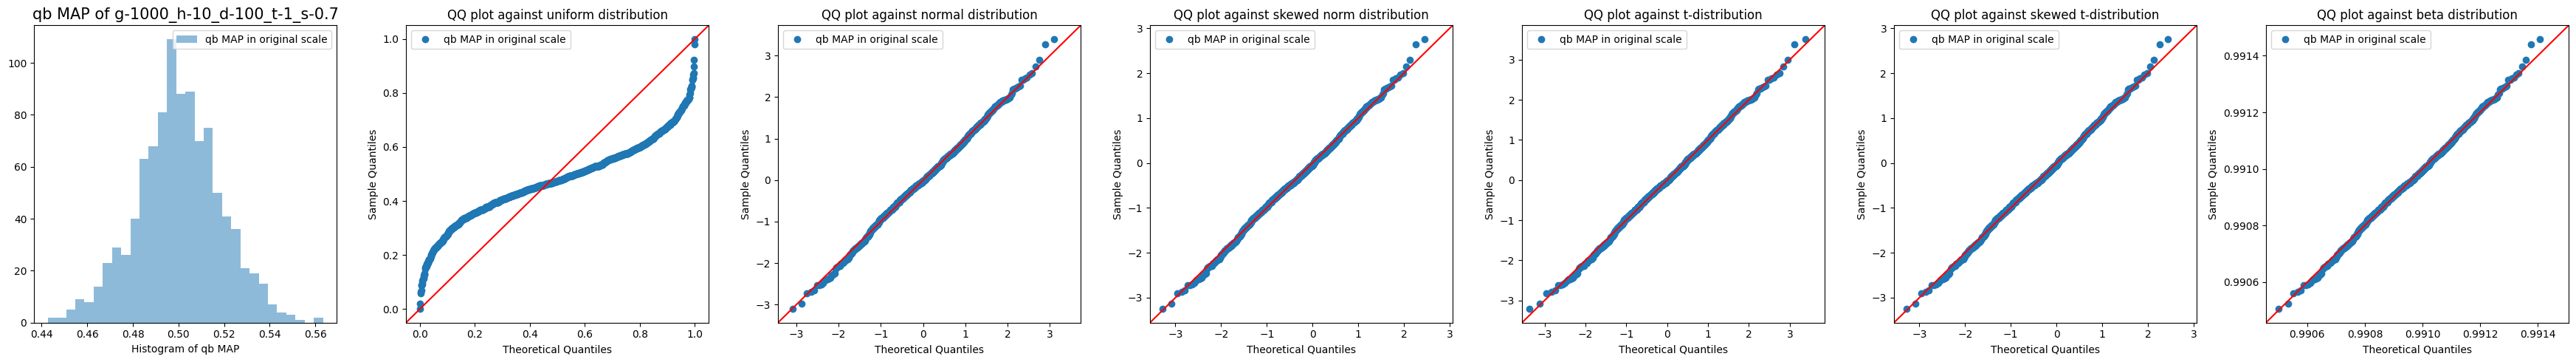

In [5]:
plot_QQ(mode_qb_neg, "qb MAP", NEG)

/tmp/ipykernel_169824/3944262892.py:119: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(stats.skewnorm.pdf(data, skew, loc=loc, scale=scale) * t.pdf(data, df=df, loc=loc, scale=scale)))


beta fitting parameters: a=145.1520102455337, b=948849.6601006398, loc=0.10639195945763233, scale=1272.753616237408


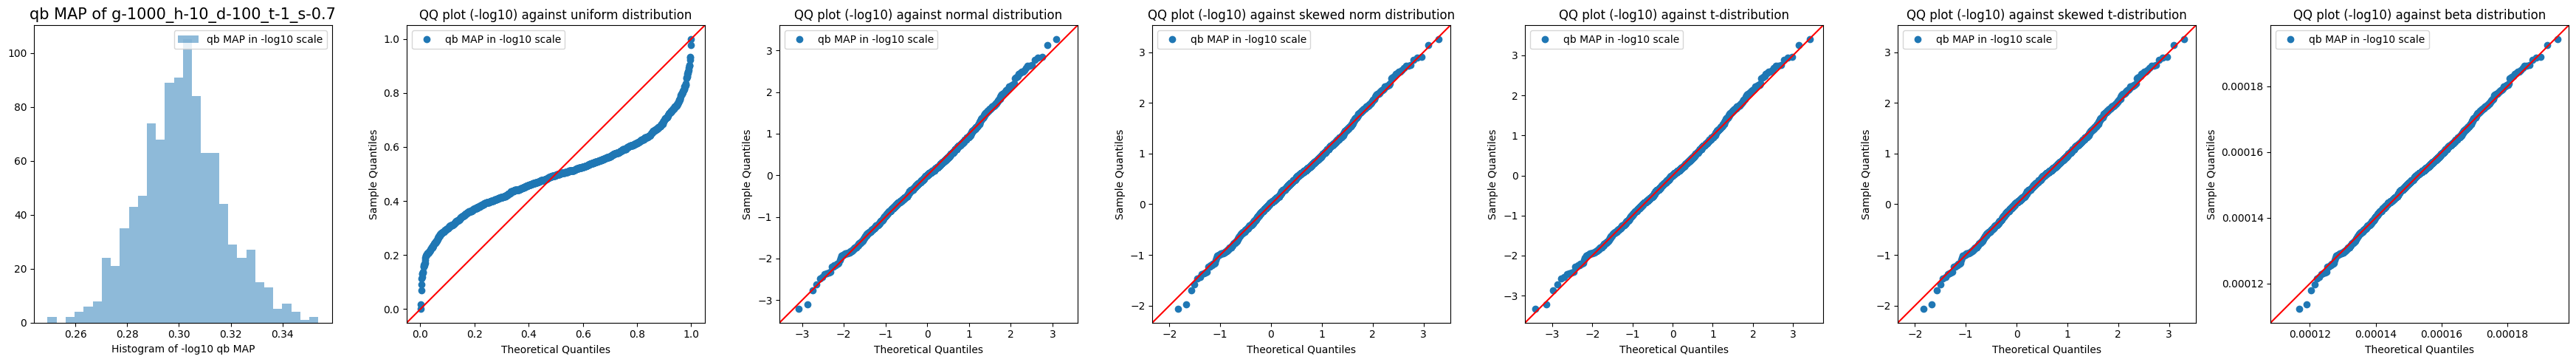

In [6]:
plot_QQ_log10(mode_qb_neg, "qb MAP", NEG)

/tmp/ipykernel_169824/3944262892.py:119: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(stats.skewnorm.pdf(data, skew, loc=loc, scale=scale) * t.pdf(data, df=df, loc=loc, scale=scale)))


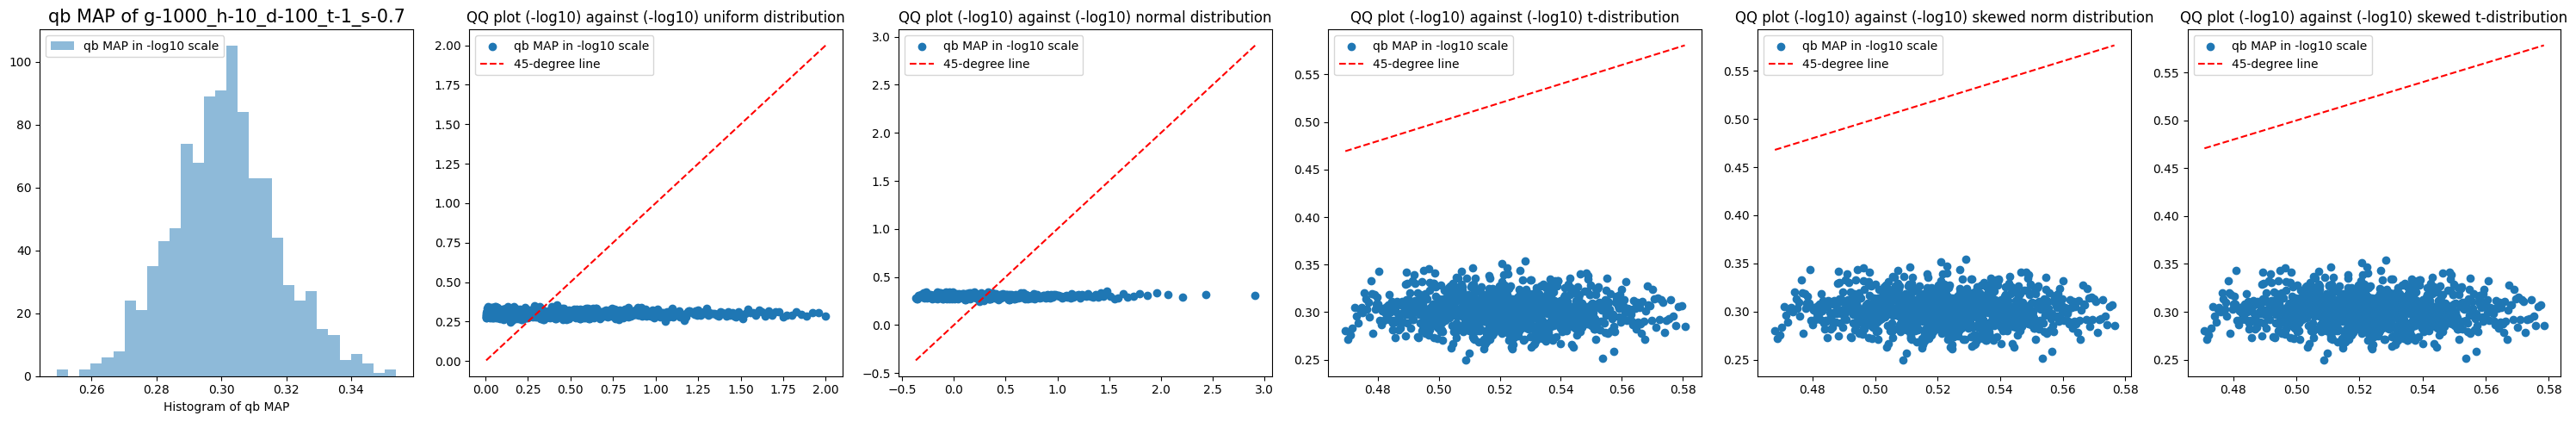

In [7]:
plot_QQ_log10_both(mode_qb_neg, "qb MAP", NEG)

In [8]:
n_hets=10
n_depth=100
alpha_beta=8.789625
lambdas=0.04545
sigma=0.7
alt=0.5
n_gene=19207904
theta=1

mode_qb_pos_19M,mode_qb_neg_19M, mode_qb_pos_p_st_19M, mode_qb_neg_p_st_19M, POS_19M, NEG_19M = prepare_data_for_plotting(n_gene, n_hets, n_depth, alt, sigma)

/home/scarlett/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


beta fitting parameters: a=8703666.026135216, b=9011424.113224853, loc=-74.31716401223503, scale=152.27981751009702


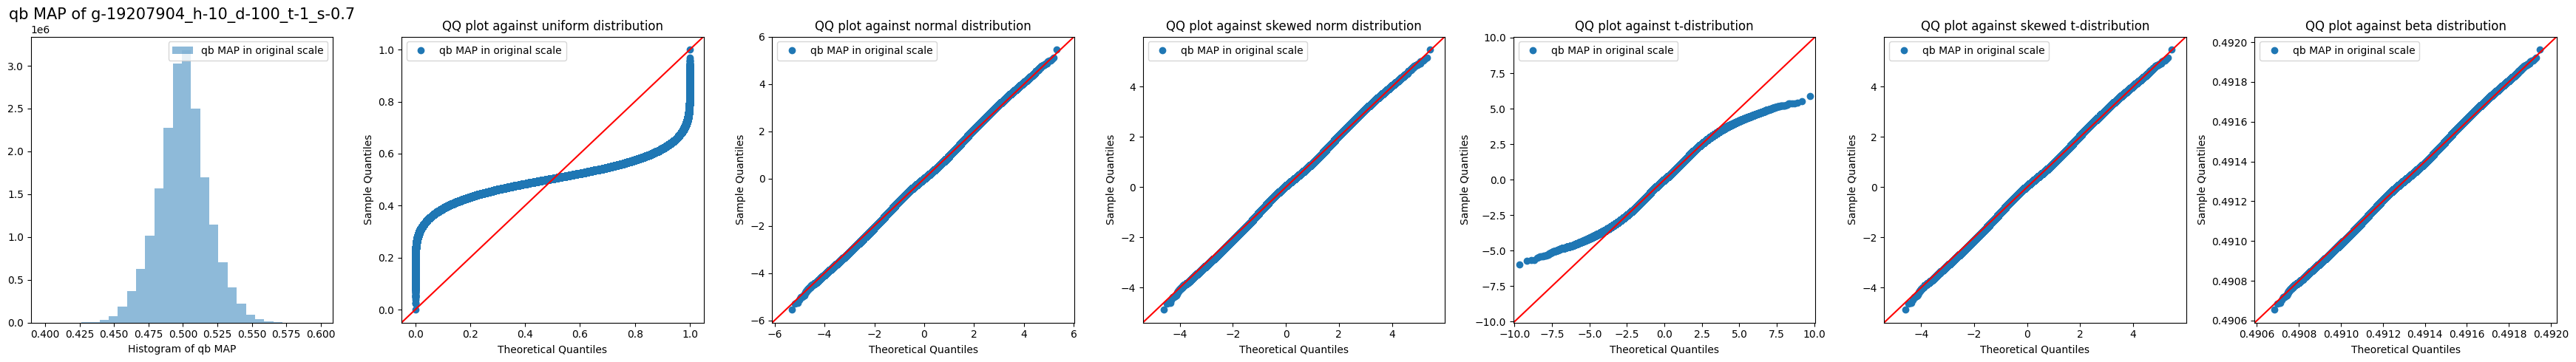

In [9]:
plot_QQ(mode_qb_neg_19M, "qb MAP", NEG_19M)

beta fitting parameters: a=254.157762587008, b=2155.49456304234, loc=0.03596330956029363, scale=2.5159354273292953


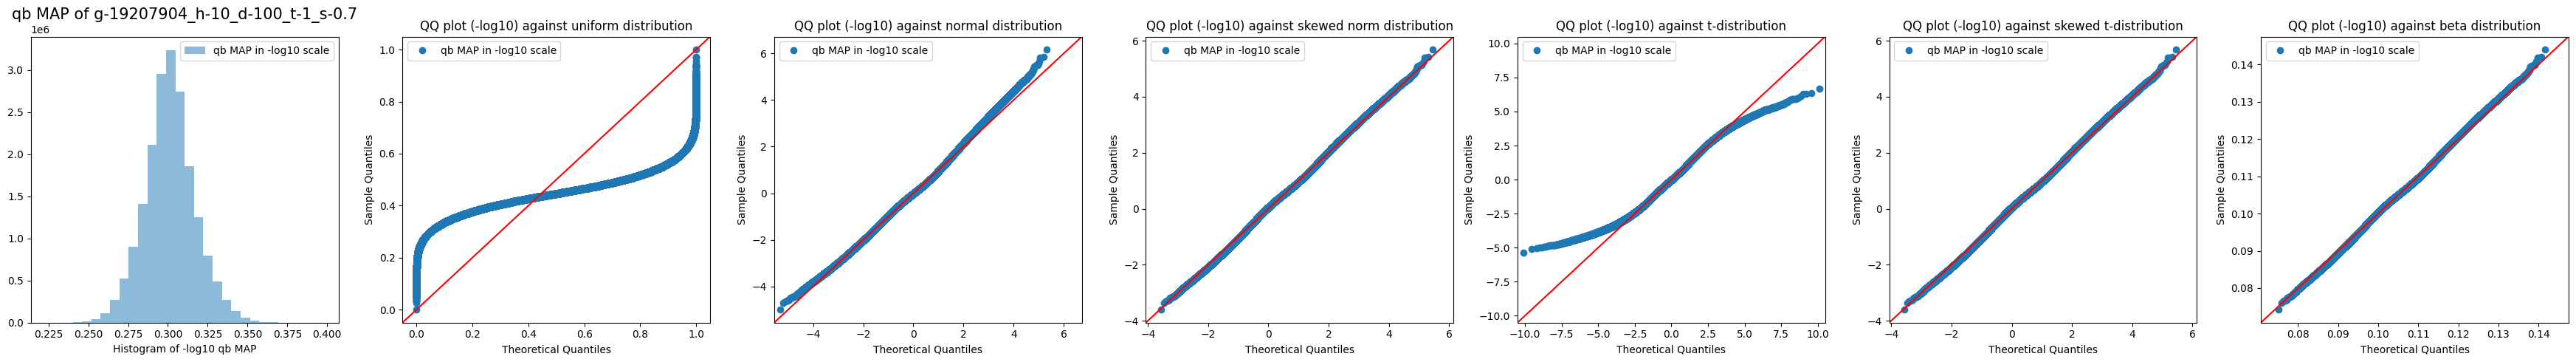

In [10]:
plot_QQ_log10(mode_qb_neg_19M, "qb MAP", NEG_19M)

/tmp/ipykernel_169824/3944262892.py:275: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


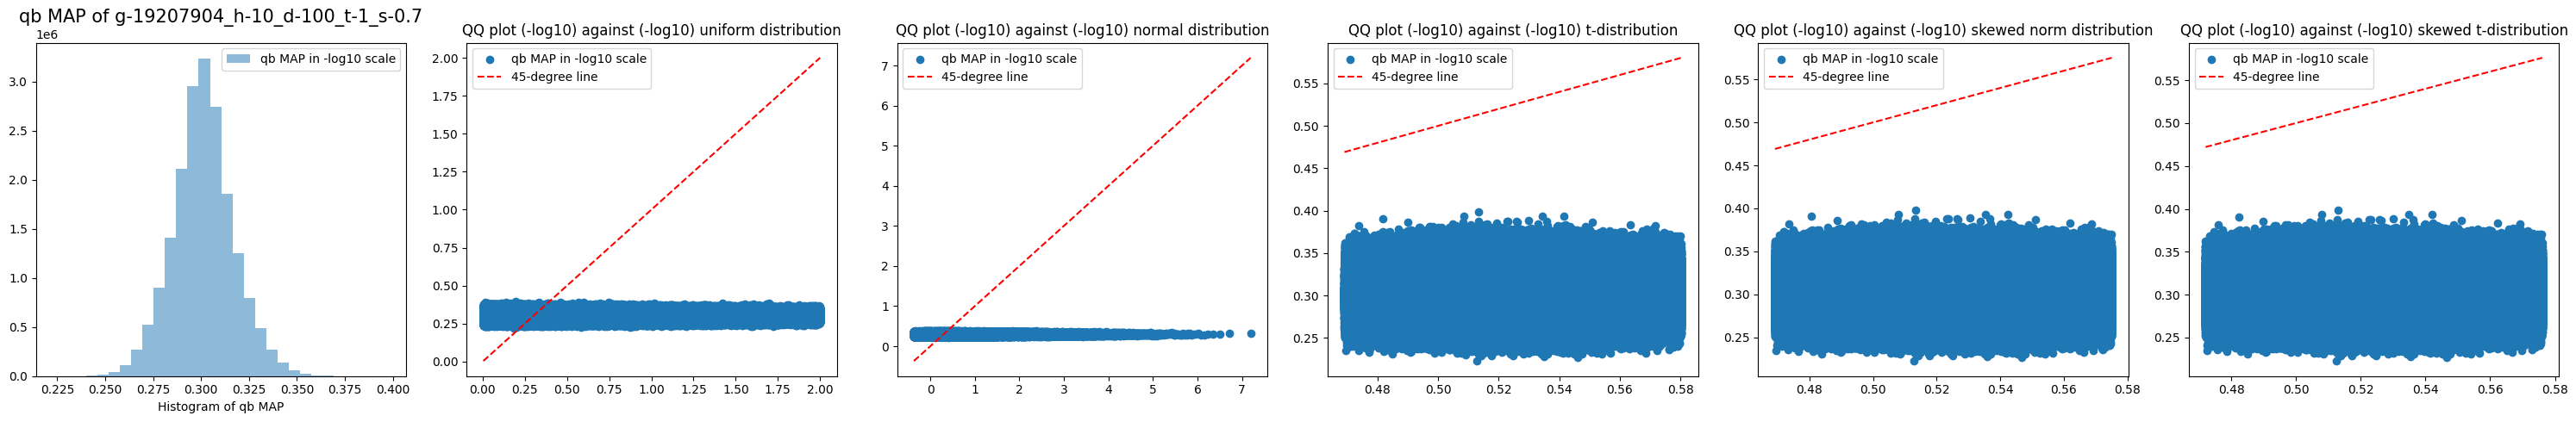

In [11]:
plot_QQ_log10_both(mode_qb_neg_19M, "qb MAP", NEG_19M)

#### data from distribution

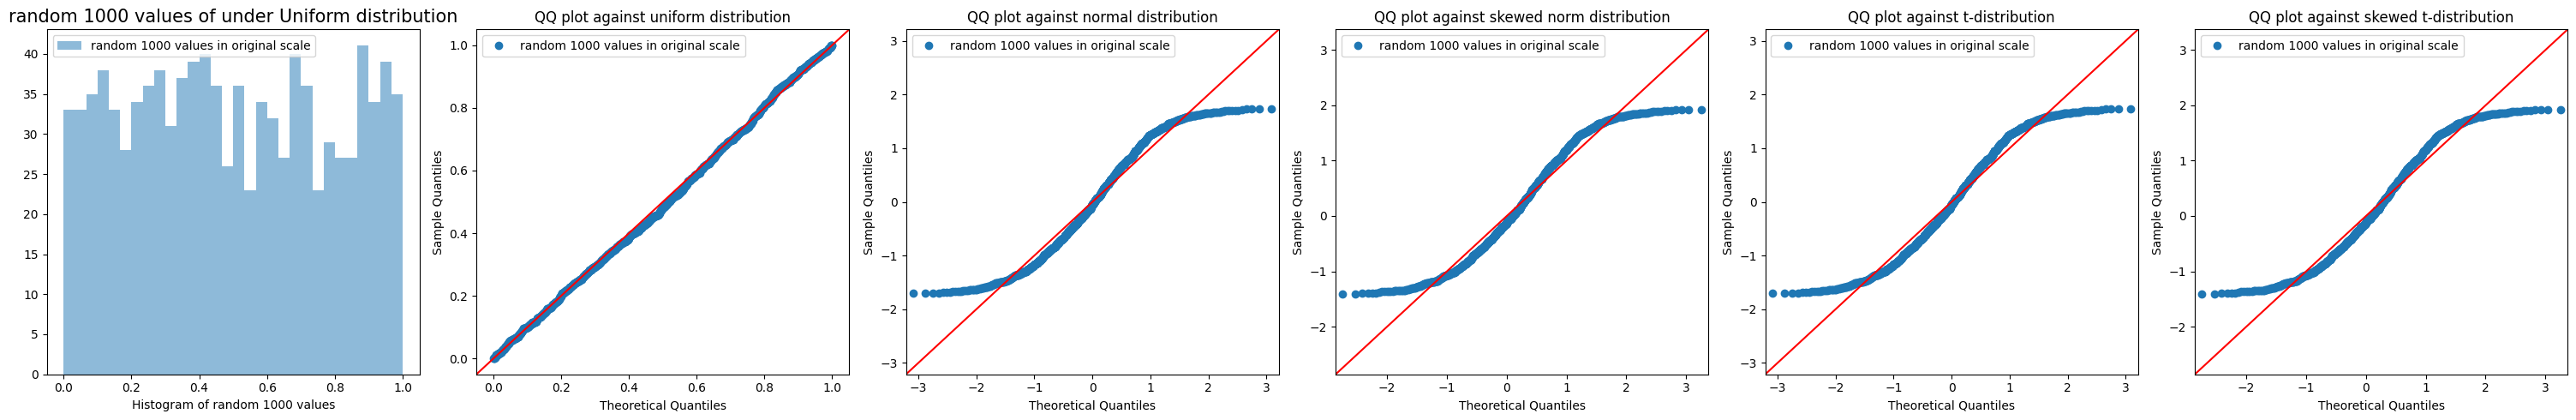

In [7]:
# Test with random data
np.random.seed(0)
uniform_random_values = np.random.uniform(low=0, high=1, size=1000)
plot_QQ(uniform_random_values, "random 1000 values", "under Uniform distribution")

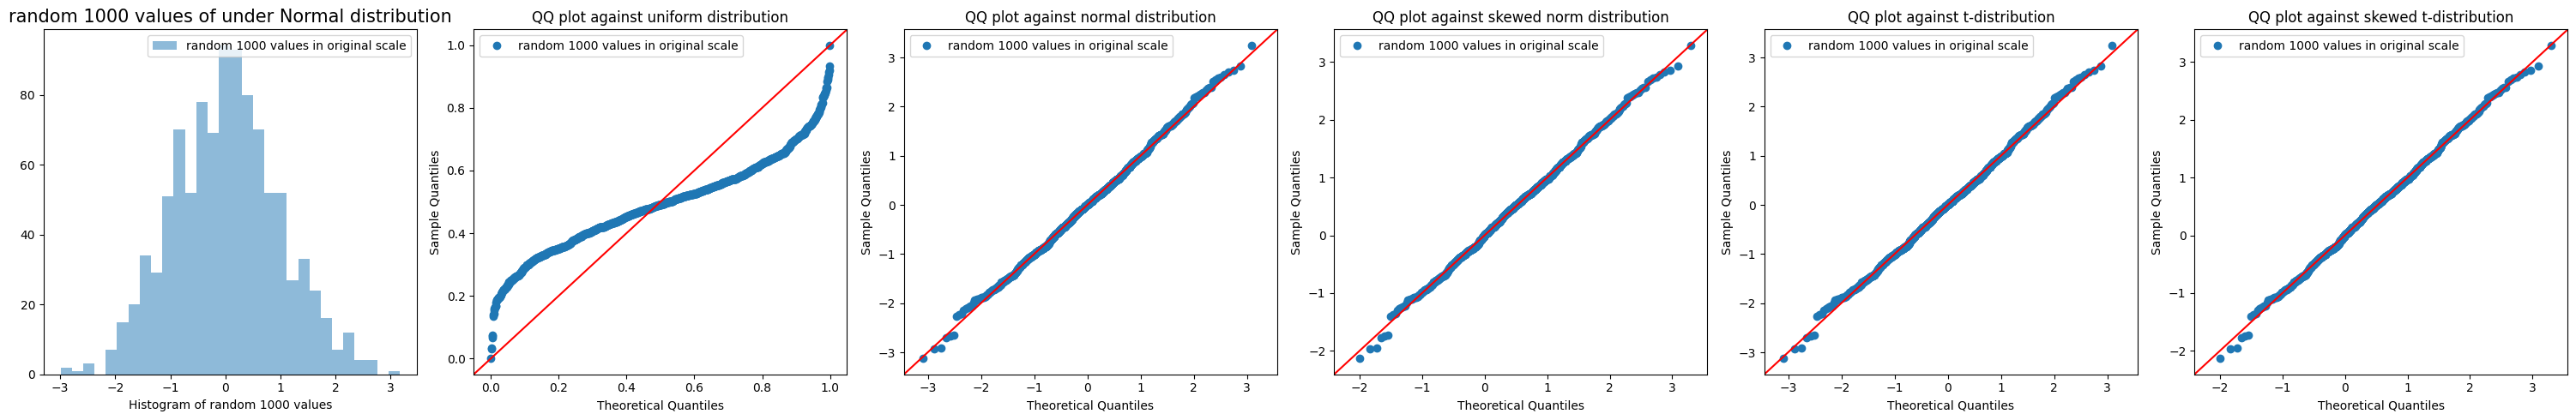

In [8]:
# Set the parameters for the normal distribution
mean = 0
std_dev = 1

# Generate 1000 random values from a normal distribution
normal_random_values = np.random.normal(loc=mean, scale=std_dev, size=1000)

plot_QQ(normal_random_values, "random 1000 values", "under Normal distribution")

/tmp/ipykernel_163159/1540670957.py:107: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(stats.skewnorm.pdf(data, skew, loc=loc, scale=scale) * t.pdf(data, df=df, loc=loc, scale=scale)))


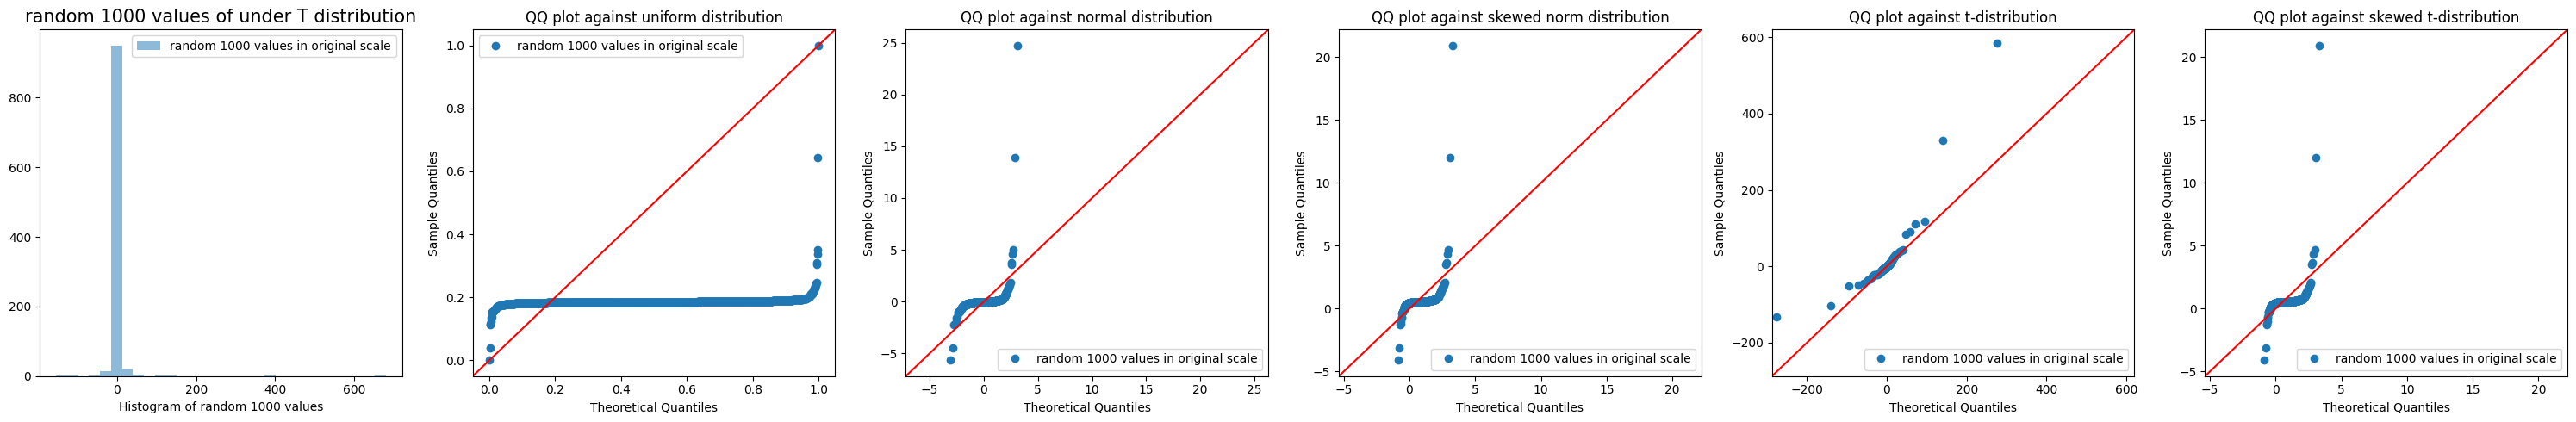

In [10]:
np.random.seed(100)
# Generate 1000 random values from a t-distribution
t_random_values = np.random.standard_t(df=1, size=1000)

plot_QQ(t_random_values,"random 1000 values", "under T distribution")

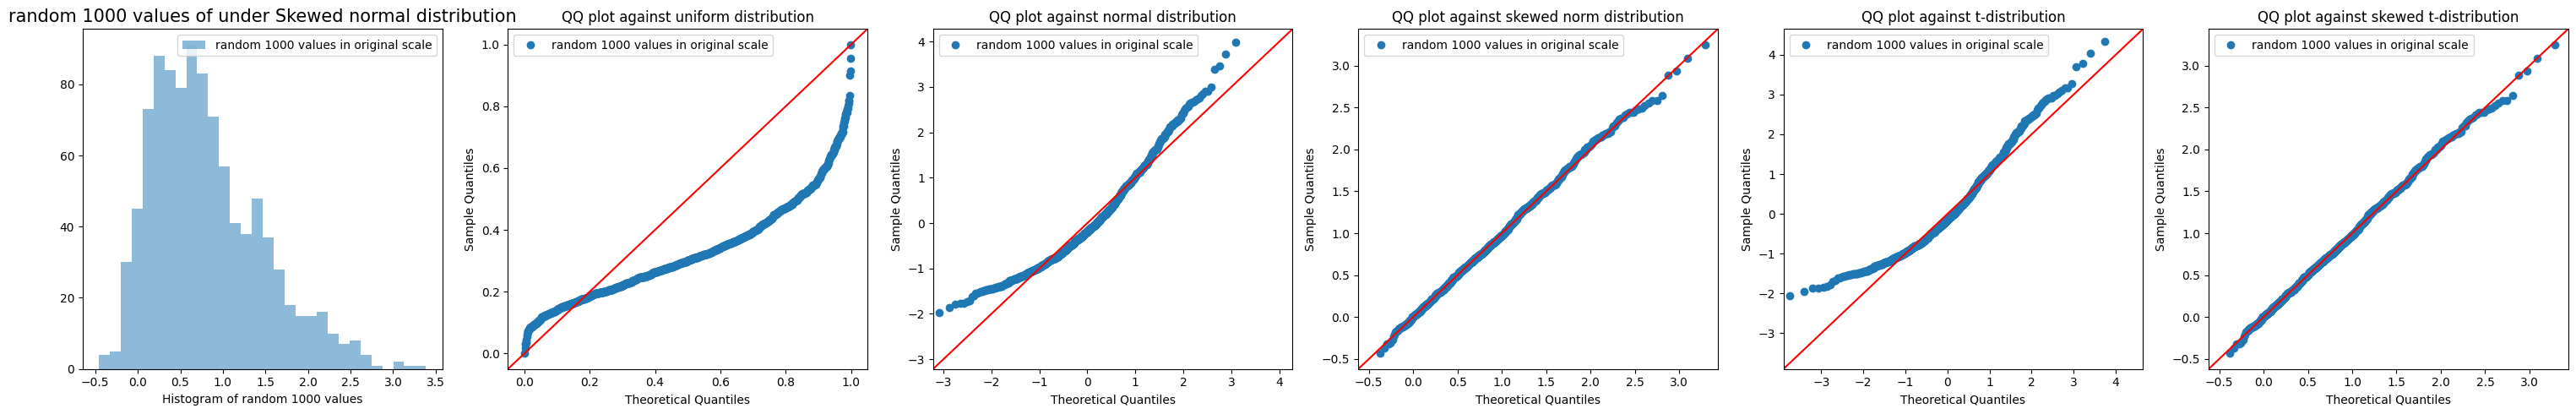

In [11]:
import numpy as np
from scipy.stats import skewnorm

# Set the parameters for the skewed normal distribution
shape_param = 5  # This is the "a" parameter, which controls the skewness
mean = 0
std_dev = 1

# Generate 1000 random values from a skewed normal distribution
skewednorm_random_values = skewnorm.rvs(a=shape_param, loc=mean, scale=std_dev, size=1000)
plot_QQ(skewednorm_random_values,"random 1000 values", "under Skewed normal distribution")

### p values after fitting to skewed normal distribution

beta fitting parameters: a=0.930912394837459, b=1.002884466032817, loc=3.467416452414967e-05, scale=1.0122058324245842


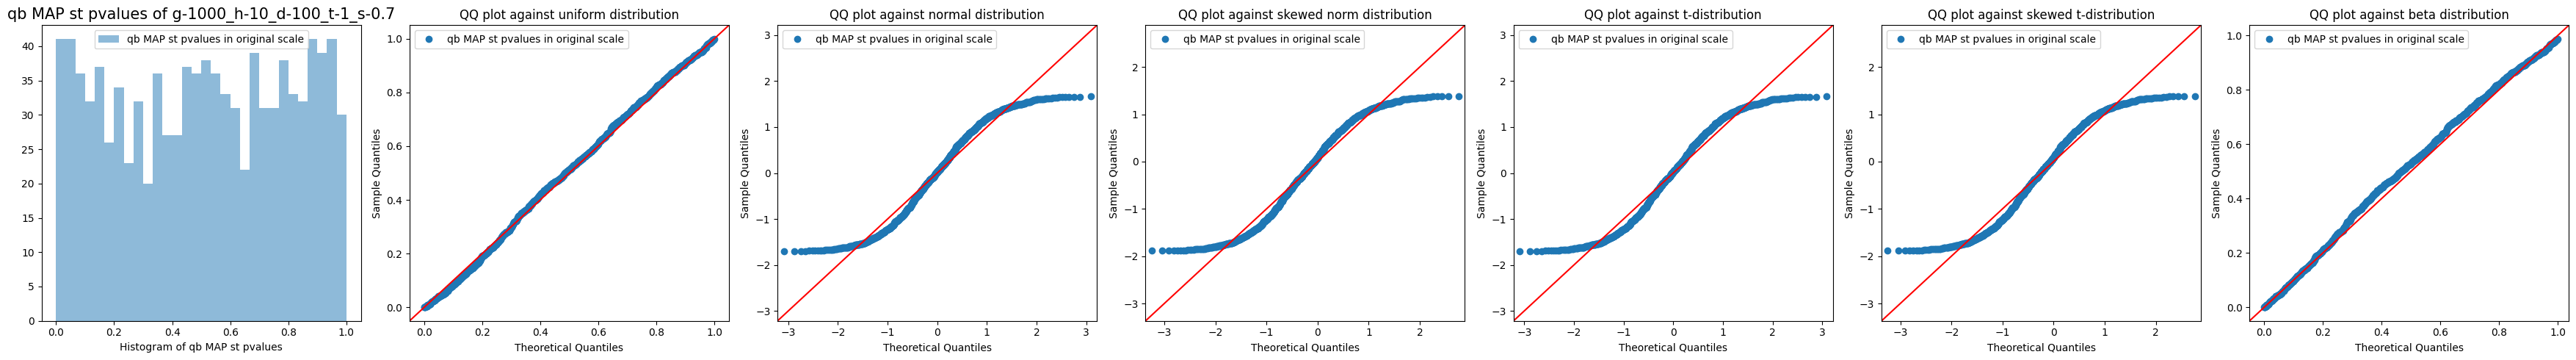

In [12]:
plot_QQ(mode_qb_neg_p_st, "qb MAP st pvalues", NEG)

/tmp/ipykernel_169824/3944262892.py:119: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(stats.skewnorm.pdf(data, skew, loc=loc, scale=scale) * t.pdf(data, df=df, loc=loc, scale=scale)))


beta fitting parameters: a=0.9218718724849012, b=8.780975193587196, loc=8.651713056562051e-06, scale=4.85536860365694


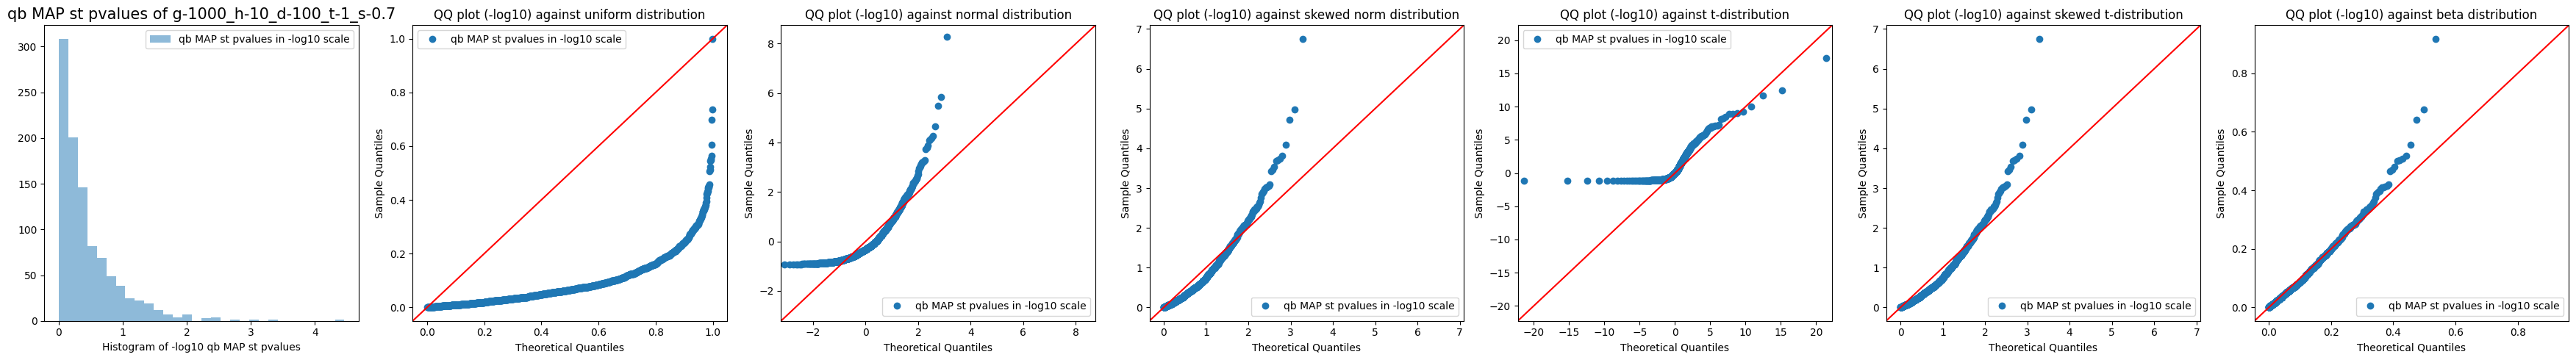

In [13]:
plot_QQ_log10(mode_qb_neg_p_st, "qb MAP st pvalues", NEG)

/tmp/ipykernel_169824/3944262892.py:119: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(stats.skewnorm.pdf(data, skew, loc=loc, scale=scale) * t.pdf(data, df=df, loc=loc, scale=scale)))


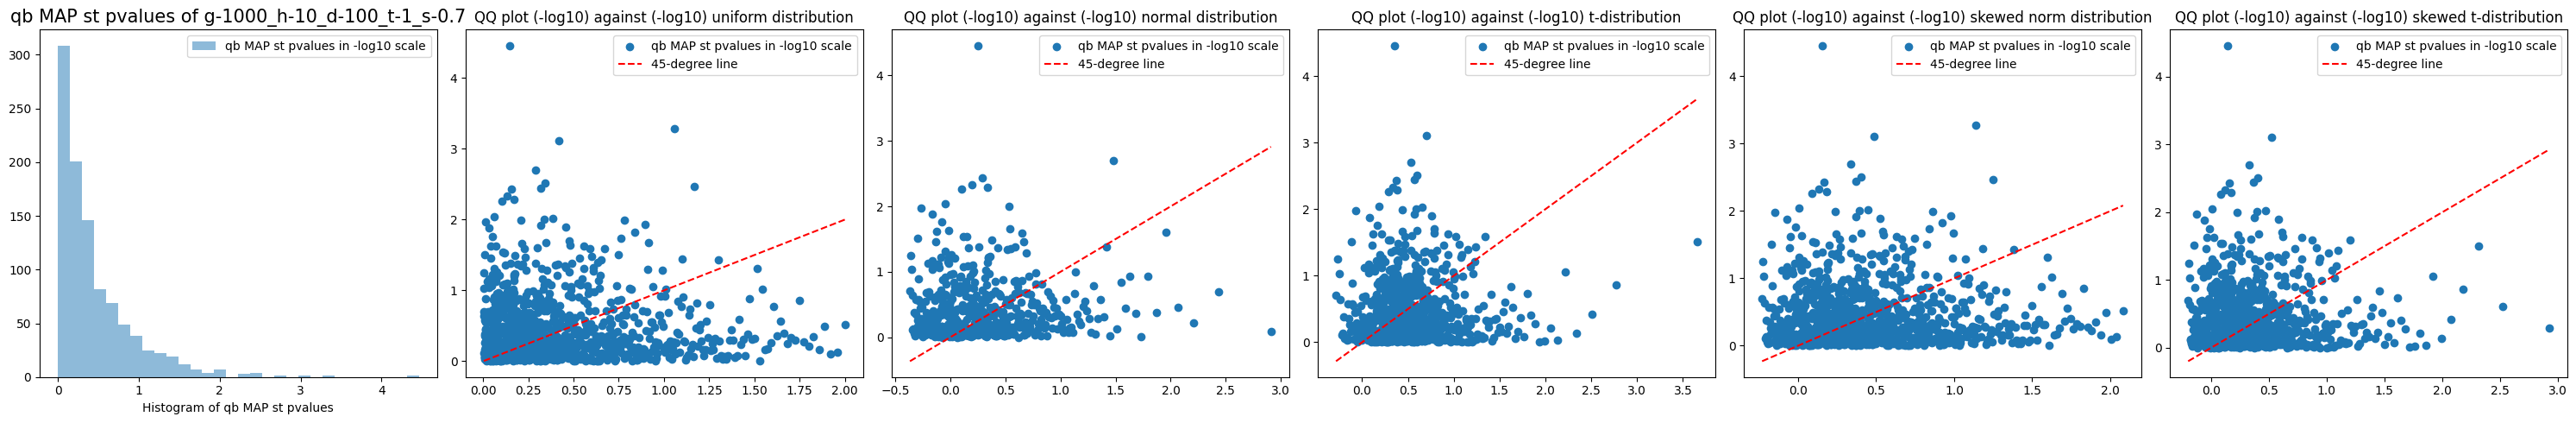

In [14]:
plot_QQ_log10_both(mode_qb_neg_p_st, "qb MAP st pvalues", NEG)

/home/scarlett/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:8723: RuntimeWarning: overflow encountered in _skewnorm_ppf
  return _boost._skewnorm_ppf(x, 0, 1, a)
/tmp/ipykernel_169824/3944262892.py:119: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(stats.skewnorm.pdf(data, skew, loc=loc, scale=scale) * t.pdf(data, df=df, loc=loc, scale=scale)))


beta fitting parameters: a=0.9961406632059857, b=1.0177711669628975, loc=2.4100479402059964e-09, scale=1.0166837604312238


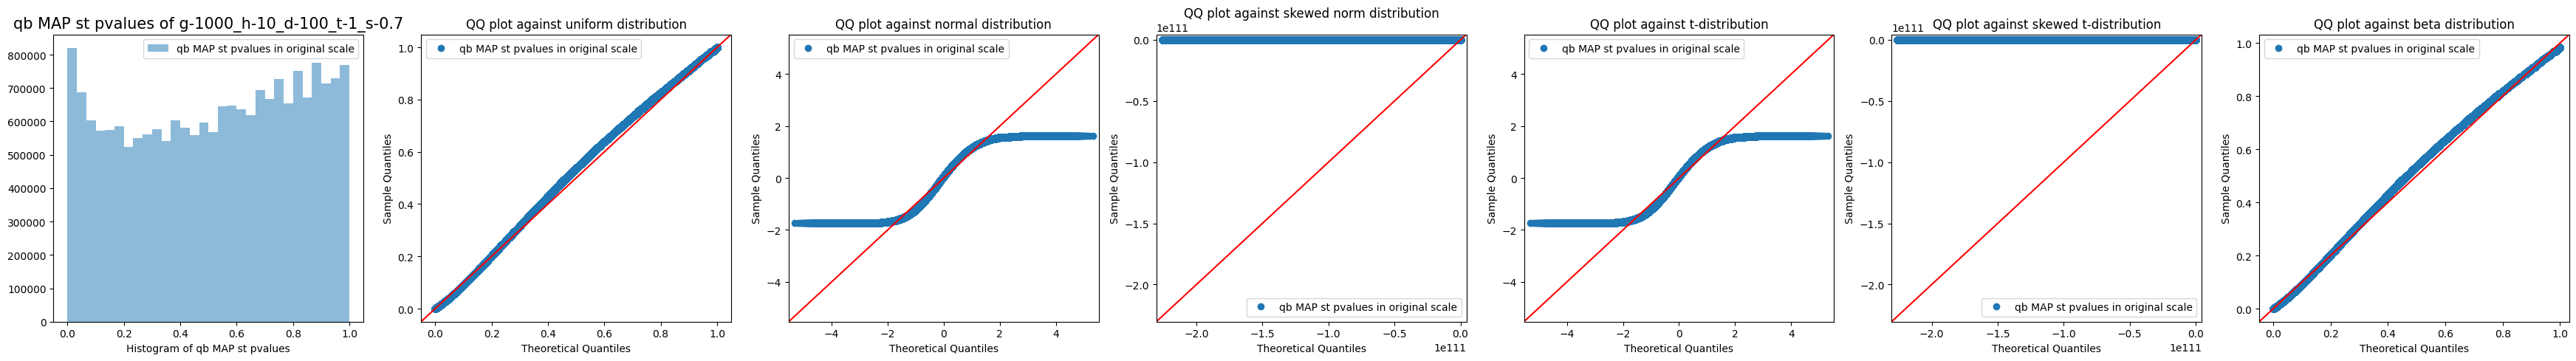

In [15]:
plot_QQ(mode_qb_neg_p_st_19M, "qb MAP st pvalues", NEG)

beta fitting parameters: a=0.8856942355648467, b=138.43477699688054, loc=6.83678815890758e-05, scale=67.90933280579716


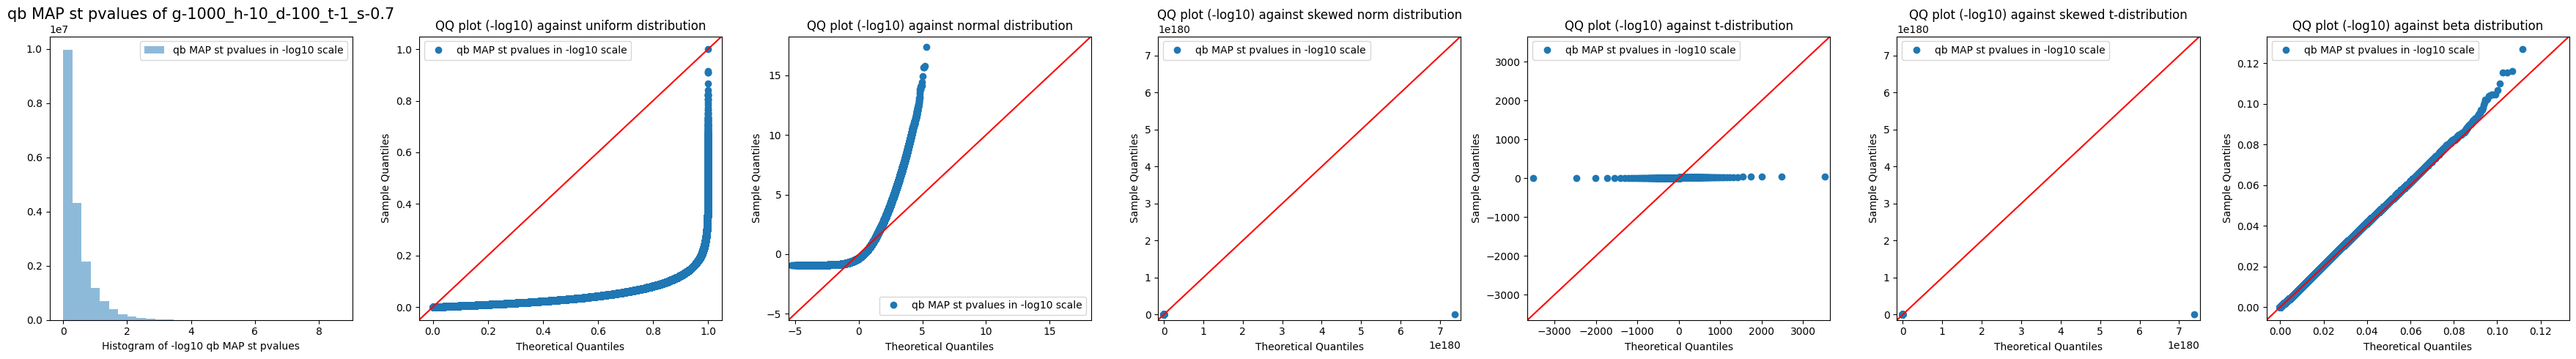

In [16]:
plot_QQ_log10(mode_qb_neg_p_st_19M, "qb MAP st pvalues", NEG)

/tmp/ipykernel_169824/3944262892.py:275: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/scarlett/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


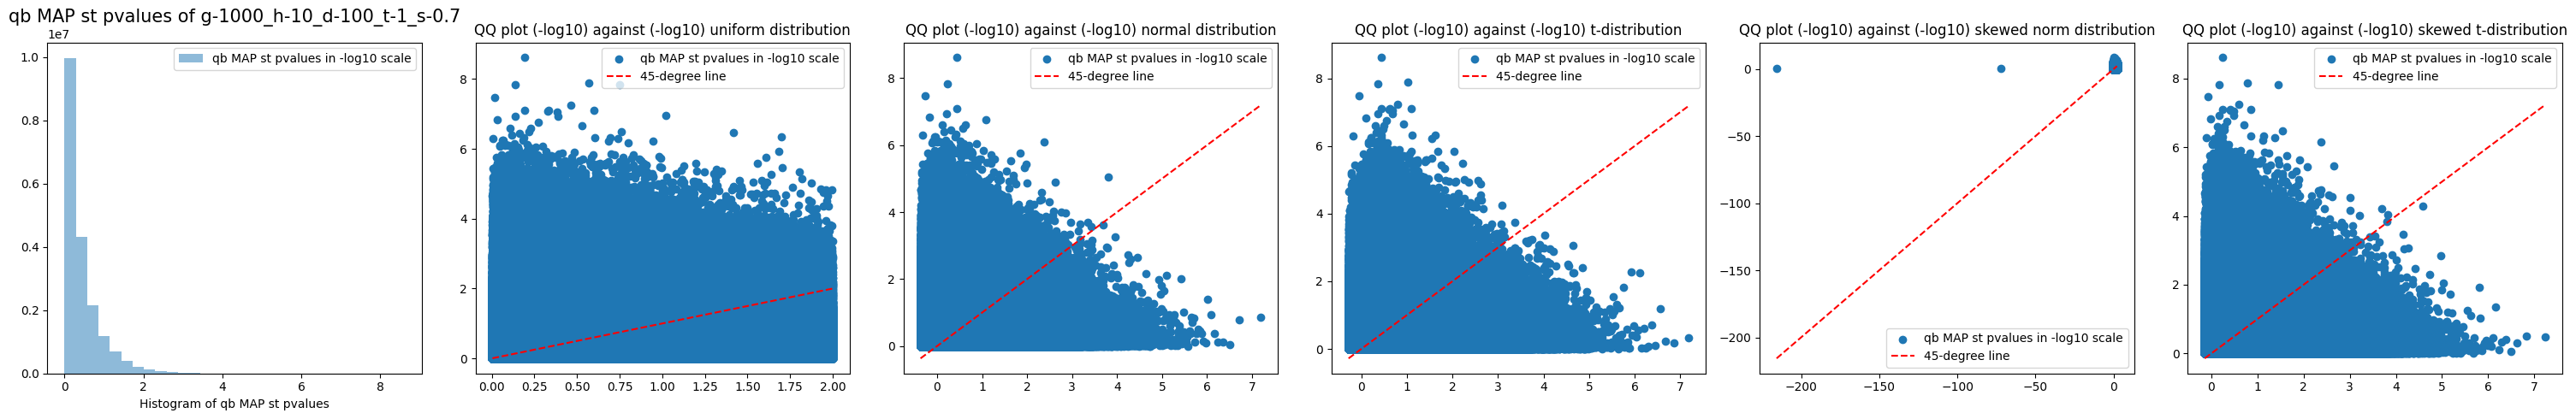

In [17]:
plot_QQ_log10_both(mode_qb_neg_p_st_19M, "qb MAP st pvalues", NEG)

### compare mean / mode

In [137]:
def plot_mean_mode(label,path_qb,n_gene, n_hets, n_depth, theta, alpha_beta, sigma):
    print(path_qb)
    NEG = f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{theta}_s-{sigma}.pickle"
    qb = get_z(path_qb,n_gene,n_hets, n_depth, theta, alpha_beta, sigma)
    #BEASTIE_zscore = calculate_posterior_value("z", BEASTIE)
    mean = pd.to_numeric(qb["qb_mean"], errors='coerce').dropna().tolist()
    mode = pd.to_numeric(qb["qb_mode"], errors='coerce').dropna().tolist()

    # Plotting
    plt.scatter(mean,mode)
    # Assuming you want a line from the bottom left to the top right
    plt.plot([min(mode), max(mode)], [min(mode), max(mode)], color='red')  # Diagonal line
    plt.title("mean vs mode",fontsize=15)
    plt.legend()
    plt.xlabel("untransformed mean")
    plt.ylabel("untransformed mode")
    plt.show()

/tmp/ipykernel_2900224/2995240970.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gene_id = random_row[0]


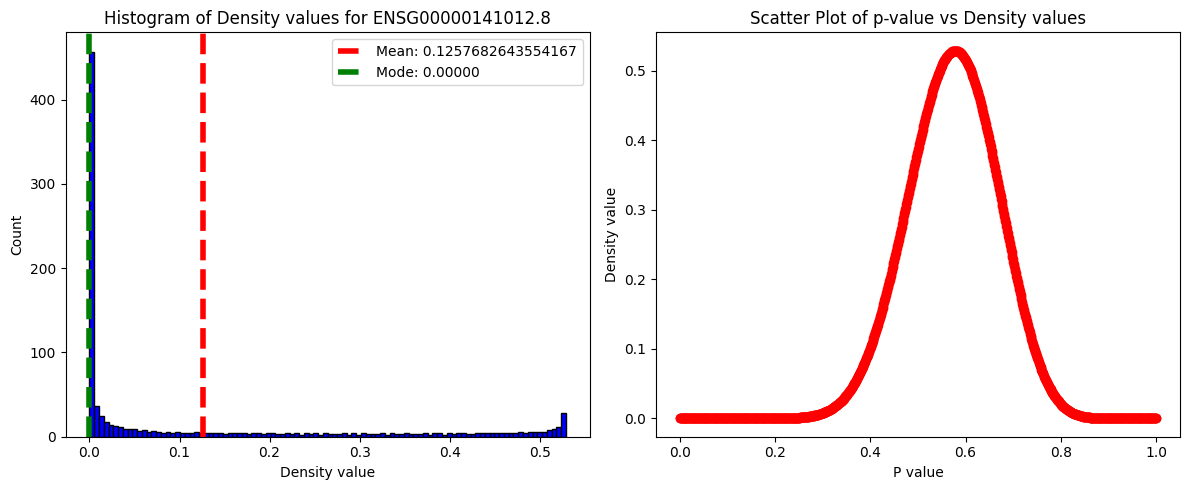

In [44]:
GIAB="/home/zack/code/QuickBEAST/NA12878_dist.tsv"
input_file_name=GIAB
visualize_gene_data(input_file_name)

/tmp/ipykernel_1862706/2995240970.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gene_id = random_row[0]


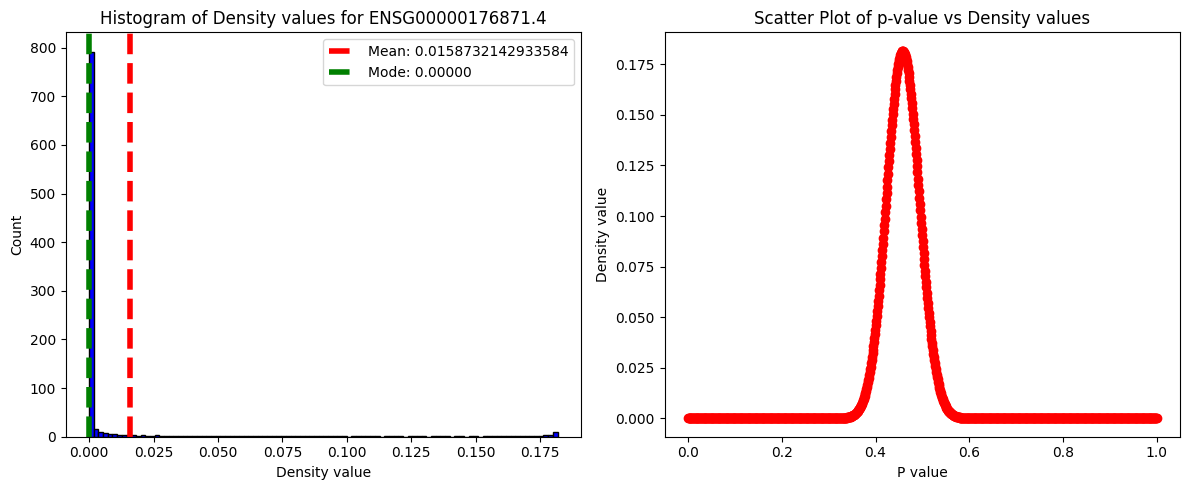

In [121]:
GIAB="/home/zack/code/QuickBEAST/NA12878_dist.tsv"
input_file_name=GIAB
visualize_gene_data(input_file_name)

/tmp/ipykernel_1862706/2995240970.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gene_id = random_row[0]


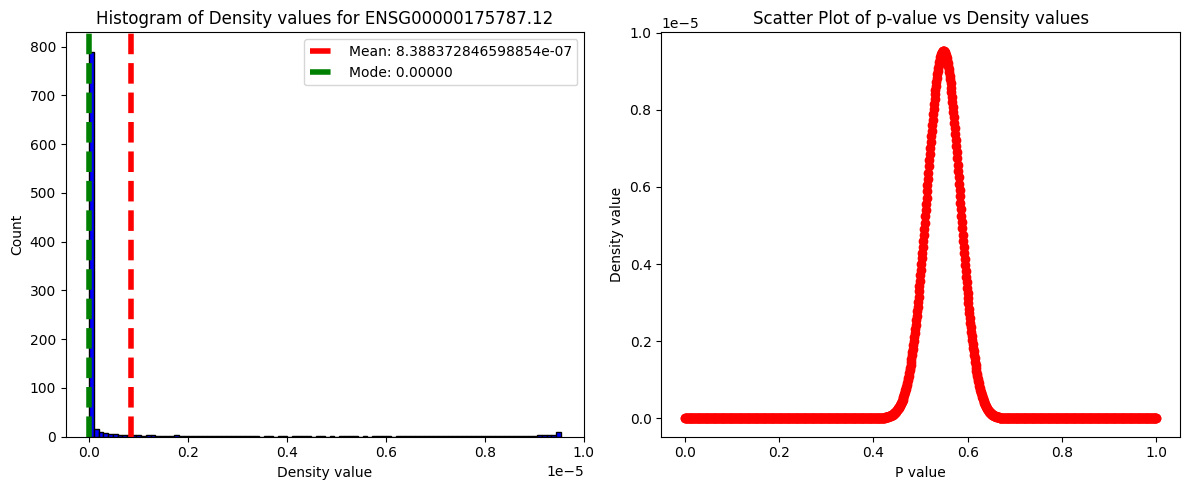

In [122]:
GIAB="/home/zack/code/QuickBEAST/NA12878_dist.tsv"
input_file_name=GIAB
visualize_gene_data(input_file_name)

/tmp/ipykernel_1862706/4162162906.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gene_id = random_row[0]


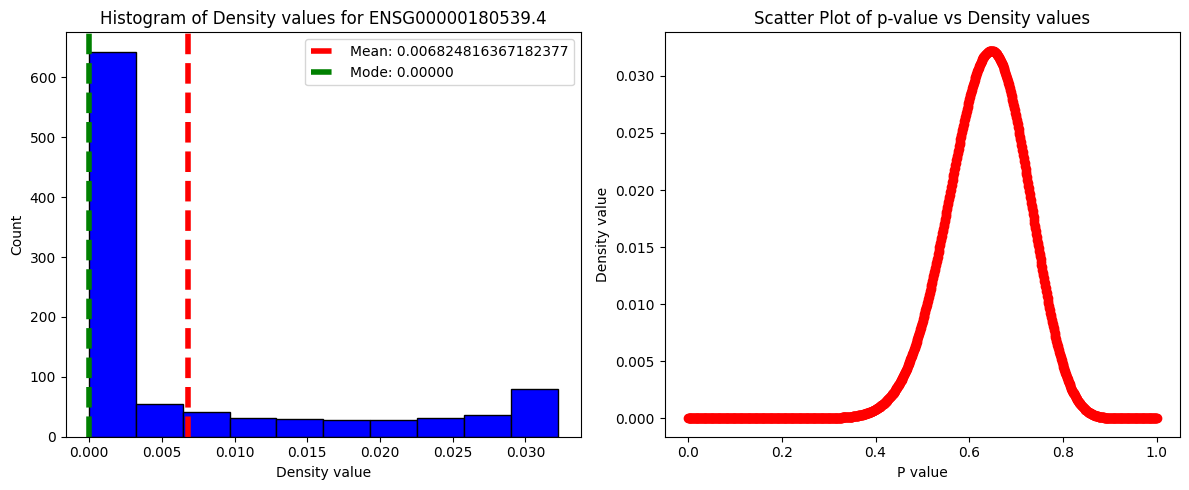

In [111]:
GIAB="/home/zack/code/QuickBEAST/NA12878_dist.tsv"
input_file_name=GIAB
visualize_gene_data(input_file_name)

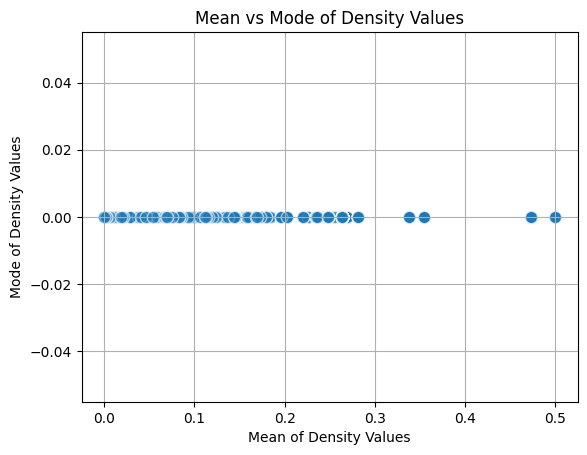

(0       8.107737e-02
 1       1.692229e-01
 2       1.011842e-03
 3       2.630509e-14
 4       1.194967e-01
             ...     
 7631    1.683864e-03
 7632    5.411370e-02
 7633    6.962611e-02
 7634    2.299768e-03
 7635    1.160397e-07
 Length: 7636, dtype: float64,
 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 7631    0.0
 7632    0.0
 7633    0.0
 7634    0.0
 7635    0.0
 Name: 0, Length: 7636, dtype: float64)

In [112]:
calculate_mean_mode_relationship(input_file_name=GIAB)

In [45]:
null_sample = "/data2/stan/quickBEAST/a8.789625_b8.789625/lambda0.04545/parametrized/ASE_0.05_error/g-1000_h-3_d-30_t-1.txt.dist"

/tmp/ipykernel_2900224/2995240970.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gene_id = random_row[0]


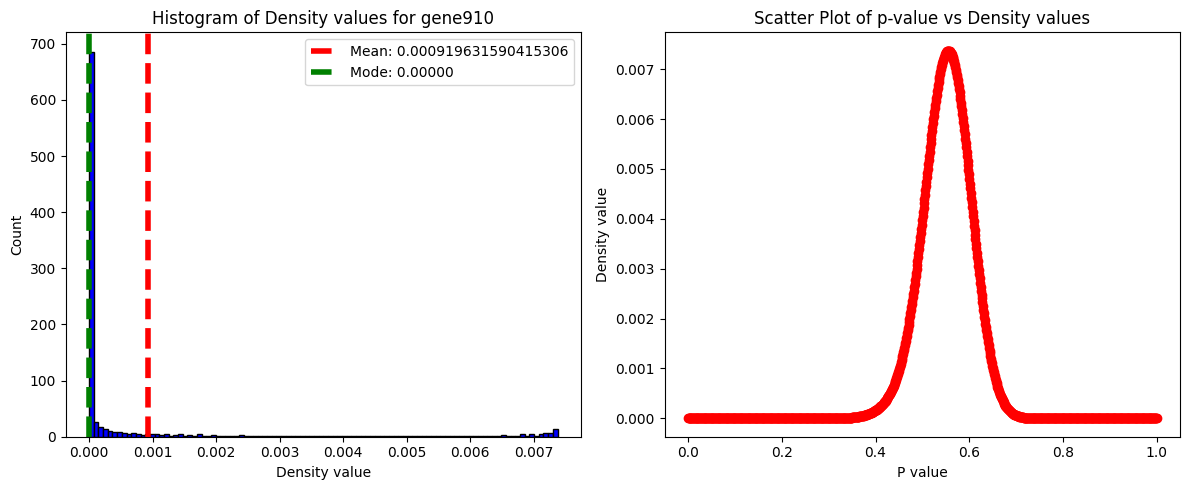

In [83]:
input_file_name=null_sample
visualize_gene_data(input_file_name)

/tmp/ipykernel_2900224/2995240970.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gene_id = random_row[0]


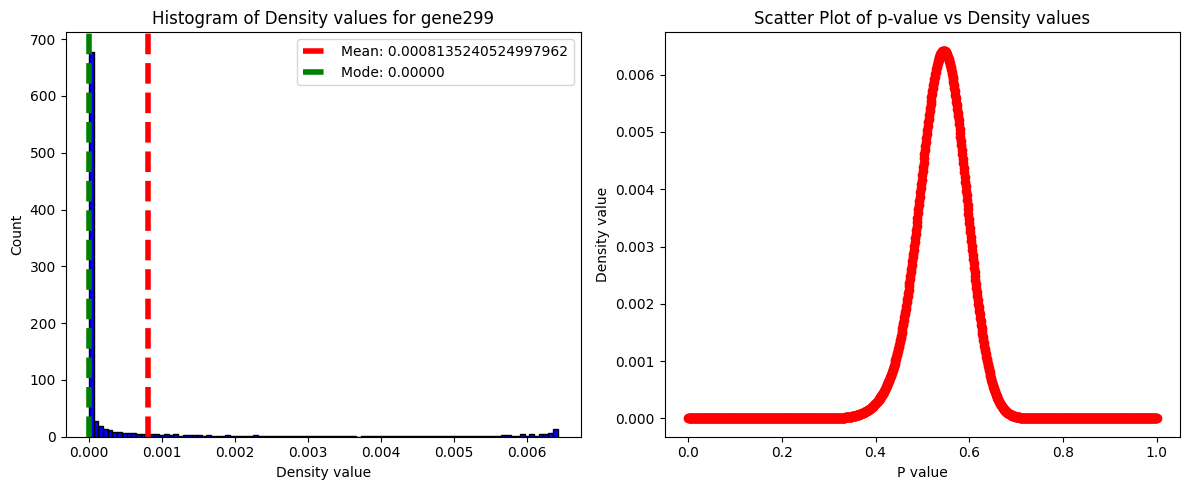

In [84]:
input_file_name=null_sample
visualize_gene_data(input_file_name)

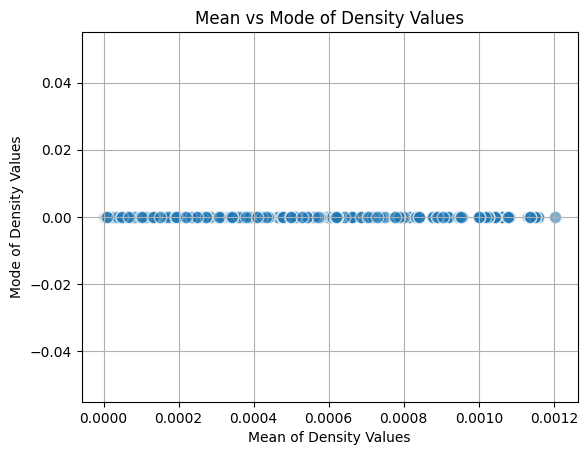

(0      0.001024
 1      0.000576
 2      0.000627
 3      0.000408
 4      0.000794
          ...   
 995    0.000841
 996    0.000904
 997    0.000620
 998    0.000529
 999    0.000730
 Length: 1000, dtype: float64,
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 995    0.0
 996    0.0
 997    0.0
 998    0.0
 999    0.0
 Name: 0, Length: 1000, dtype: float64)

In [119]:
calculate_mean_mode_relationship(input_file_name=null_sample)

In [14]:

def visualize_gene_data(input_file_name):
    with open(input_file_name, 'r') as file:
        line = file.readline().strip()

    # Split the line into parts
    parts = line.split('\t')

    # Extract the gene ID
    gene_id = parts[0]

    # Extract Xs and Ys
    xs = parts[1::2]  # Take every second element starting from the first
    ys = parts[2::2]  # Take every second element starting from the second

    # Converting strings to floats for Xs and Ys if needed
    x_values = [float(x) for x in xs]
    y_values = [float(y) for y in ys]

    # Convert y_values to numeric, coercing errors to NaN
    y_values_numeric = pd.to_numeric(y_values, errors='coerce')

    # Filter out NaN values
    filtered_y_values = y_values_numeric[~np.isnan(y_values_numeric)]

    # Calculate mode
    mode_result = stats.mode(filtered_y_values)

    # Now calculate the mode using the numeric values
    # Check if mode_result.mode is a scalar or an array
    if np.isscalar(mode_result.mode):
        y_mode = mode_result.mode
    else:
        y_mode = mode_result.mode[0]
    # Calculate mean
    y_mean = np.nanmean(y_values_numeric)

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot histogram of Y values
    ax[0].hist(y_values, bins=100, color='blue', edgecolor='black')
    ax[0].axvline(y_mean, color='red', linestyle='dashed', linewidth=4, label=f'Mean: {y_mean}')
    ax[0].axvline(y_mode, color='green', linestyle='dashed', linewidth=4, label=f'Mode: {y_mode:.5f}')
    ax[0].set_title(f'Histogram of Density values for {gene_id}')
    ax[0].set_xlabel('Density value')
    ax[0].set_ylabel('Count')
    ax[0].legend()
    # Scatter plot of X vs Y values
    ax[1].scatter(x_values, y_values, color='red')
    ax[1].set_title(f'Posterior for {gene_id}')
    ax[1].set_xlabel('P value')
    ax[1].set_ylabel('Density value')


    plt.tight_layout()
    plt.show()


def visualize_gene_data(input_file_name):
    with open(input_file_name, 'r') as file:
        line = file.readline().strip()

    # Split the line into parts
    parts = line.split('\t')

    # Extract the gene ID
    gene_id = parts[0]

    # Extract Xs and Ys
    xs = parts[1::2]  # Take every second element starting from the first
    ys = parts[2::2]  # Take every second element starting from the second

    # Converting strings to floats for Xs and Ys if needed
    x_values = [float(x) for x in xs]
    y_values = [float(y) for y in ys]

    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    
    # Scatter plot of X vs Y values
    ax.scatter(x_values, y_values, color='red')
    ax.set_title(f'Posterior for {gene_id}')
    ax.set_xlabel('Binomial Proportaion P values')
    ax.set_ylabel('Density')

    plt.tight_layout()
    plt.show()

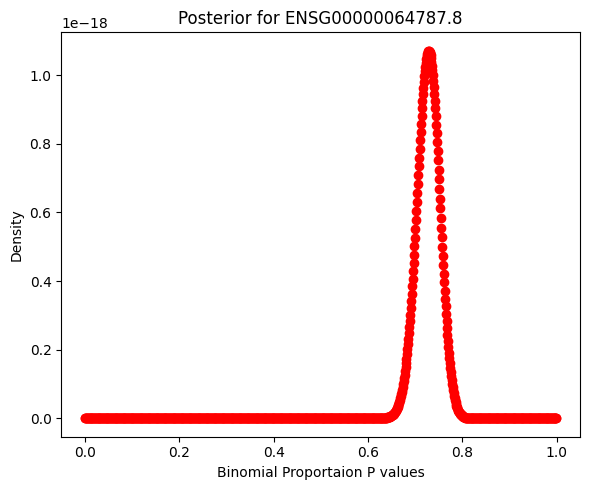

In [13]:
visualize_gene_data("/home/scarlett/github/RNAseq-analysis/run_quickBeast/test_data/ENSG00000064787.dist")

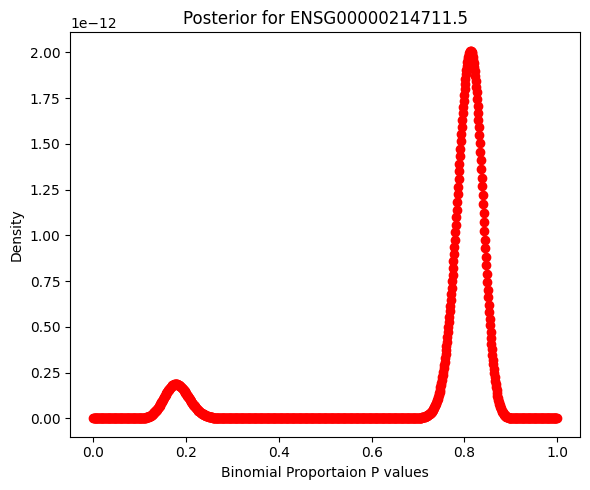

In [16]:
visualize_gene_data("/home/scarlett/github/RNAseq-analysis/run_quickBeast/test_data/ENSG00000214711.dist")

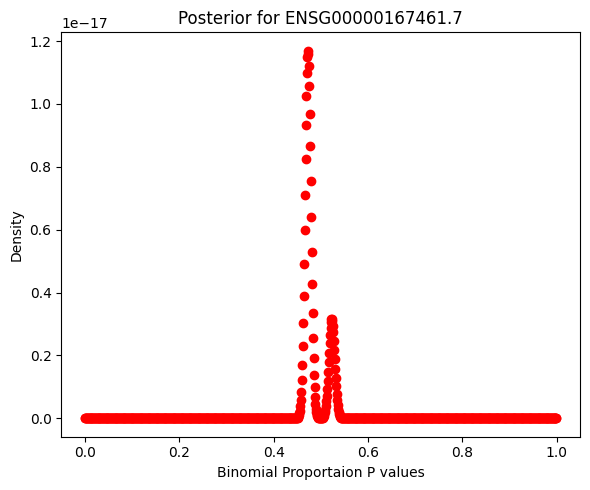

In [17]:
visualize_gene_data("/home/scarlett/github/RNAseq-analysis/run_quickBeast/test_data/ENSG00000167461.dist")